# Martin Varbanov 
# Statistics 00165
# High order statistical models  project

# Introduction

#### Read csv

In [1]:
path_data = "data/OnlineNewsPopularity/"
input_data_name = "OnlineNewsPopularity.csv"
full_path = paste(path_data, input_data_name, sep="")
input_df = read.csv(full_path)

In [2]:
head(input_df)

url                                                            timedelta
1 http://mashable.com/2013/01/07/amazon-instant-video-browser/   731      
2 http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/    731      
3 http://mashable.com/2013/01/07/apple-40-billion-app-downloads/ 731      
4 http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/       731      
5 http://mashable.com/2013/01/07/att-u-verse-apps/               731      
6 http://mashable.com/2013/01/07/beewi-smart-toys/               731      
  n_tokens_title n_tokens_content n_unique_tokens n_non_stop_words
1 12              219             0.6635945       1               
2  9              255             0.6047431       1               
3  9              211             0.5751295       1               
4  9              531             0.5037879       1               
5 13             1072             0.4156456       1               
6 10              370             0.5598886       1               
  n_non_stop_unique_tokens num_hrefs num_self_hrefs num_imgs ⋯
1 0.8153846                 4         2              1       ⋯
2 0.7919463                 3         1              1       ⋯
3 0.6638655                 3         1              1       ⋯
4 0.6656347                 9         0              1       ⋯
5 0.5408895                19        19             20       ⋯
6 0.6981982                 2         2              0       ⋯
  min_positive_polarity max_positive_polarity avg_negative_polarity
1 0.10000000            0.7                   -0.3500000           
2 0.03333333            0.7                   -0.1187500           
3 0.10000000            1.0                   -0.4666667           
4 0.13636364            0.8                   -0.3696970           
5 0.03333333            1.0                   -0.2201923           
6 0.13636364            0.6                   -0.1950000           
  min_negative_polarity max_negative_polarity title_subjectivity
1 -0.600                -0.2000000            0.5000000         
2 -0.125                -0.1000000            0.0000000         
3 -0.800                -0.1333333            0.0000000         
4 -0.600                -0.1666667            0.0000000         
5 -0.500                -0.0500000            0.4545455         
6 -0.400                -0.1000000            0.6428571         
  title_sentiment_polarity abs_title_subjectivity abs_title_sentiment_polarity
1 -0.1875000               0.00000000             0.1875000                   
2  0.0000000               0.50000000             0.0000000                   
3  0.0000000               0.50000000             0.0000000                   
4  0.0000000               0.50000000             0.0000000                   
5  0.1363636               0.04545455             0.1363636                   
6  0.2142857               0.14285714             0.2142857                   
  shares
1  593  
2  711  
3 1500  
4 1200  
5  505  
6  855

#### Validate that we have no missing values:

In [3]:
length(input_df[is.na(input_df)==TRUE])

[1] 0

#### We remove the url and timedelta column, as they don't bring value to the data:

In [4]:
input_df <- subset( input_df, select = -c(url, timedelta))

#### We can see that there are almost 40000 rows in the dataframe

In [5]:
nrow(input_df)

[1] 39644

In [6]:
head(input_df)

n_tokens_title n_tokens_content n_unique_tokens n_non_stop_words
1 12              219             0.6635945       1               
2  9              255             0.6047431       1               
3  9              211             0.5751295       1               
4  9              531             0.5037879       1               
5 13             1072             0.4156456       1               
6 10              370             0.5598886       1               
  n_non_stop_unique_tokens num_hrefs num_self_hrefs num_imgs num_videos
1 0.8153846                 4         2              1       0         
2 0.7919463                 3         1              1       0         
3 0.6638655                 3         1              1       0         
4 0.6656347                 9         0              1       0         
5 0.5408895                19        19             20       0         
6 0.6981982                 2         2              0       0         
  average_token_length ⋯ min_positive_polarity max_positive_polarity
1 4.680365             ⋯ 0.10000000            0.7                  
2 4.913725             ⋯ 0.03333333            0.7                  
3 4.393365             ⋯ 0.10000000            1.0                  
4 4.404896             ⋯ 0.13636364            0.8                  
5 4.682836             ⋯ 0.03333333            1.0                  
6 4.359459             ⋯ 0.13636364            0.6                  
  avg_negative_polarity min_negative_polarity max_negative_polarity
1 -0.3500000            -0.600                -0.2000000           
2 -0.1187500            -0.125                -0.1000000           
3 -0.4666667            -0.800                -0.1333333           
4 -0.3696970            -0.600                -0.1666667           
5 -0.2201923            -0.500                -0.0500000           
6 -0.1950000            -0.400                -0.1000000           
  title_subjectivity title_sentiment_polarity abs_title_subjectivity
1 0.5000000          -0.1875000               0.00000000            
2 0.0000000           0.0000000               0.50000000            
3 0.0000000           0.0000000               0.50000000            
4 0.0000000           0.0000000               0.50000000            
5 0.4545455           0.1363636               0.04545455            
6 0.6428571           0.2142857               0.14285714            
  abs_title_sentiment_polarity shares
1 0.1875000                     593  
2 0.0000000                     711  
3 0.0000000                    1500  
4 0.0000000                    1200  
5 0.1363636                     505  
6 0.2142857                     855

#### Baseline model

Before we proceed with our analysis, we have to construct a fundamental node, from which we could validate if our model changes are improving the model itself.

To do this we will create a simple linear regression, including all of the features:

In [7]:
baseline_model = lm(shares~., data=input_df)
summary(baseline_model)


Call:
lm(formula = shares ~ ., data = input_df)

Residuals:
   Min     1Q Median     3Q    Max 
-29737  -2255  -1220   -107 837629 

Coefficients: (2 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.763e+05  6.130e+06  -0.029  0.97706    
n_tokens_title                 8.986e+01  2.867e+01   3.134  0.00173 ** 
n_tokens_content               5.936e-01  2.235e-01   2.656  0.00791 ** 
n_unique_tokens                3.985e+03  1.919e+03   2.077  0.03779 *  
n_non_stop_words              -1.484e+03  5.911e+03  -0.251  0.80182    
n_non_stop_unique_tokens      -1.641e+03  1.629e+03  -1.007  0.31405    
num_hrefs                      2.654e+01  6.706e+00   3.958 7.58e-05 ***
num_self_hrefs                -5.764e+01  1.782e+01  -3.235  0.00122 ** 
num_imgs                       1.190e+01  8.942e+00   1.330  0.18336    
num_videos                     5.645e+00  1.575e+01   0.358  0.72006    
average_

#### Result:

We have a $R^2=0.02$ which is very low. At an intuitive level we could assume that there is a lot of noise in the data. A lot of features might deflate the information, rather than providing it.

My initial assumption is that as a result, PCAs would have a lot of the dispersion concentrated in a small proportion of features

#### Lets check the Distributions of the features:

In [8]:
is_normal<- function(x){
    hist(x)
}

In [9]:
i=1
names(input_df[,i:2])[i]

[1] "n_tokens_title"

#### We will make some graphs for each column to check their distribution

How could we test distribution, as the number of rows is too big?

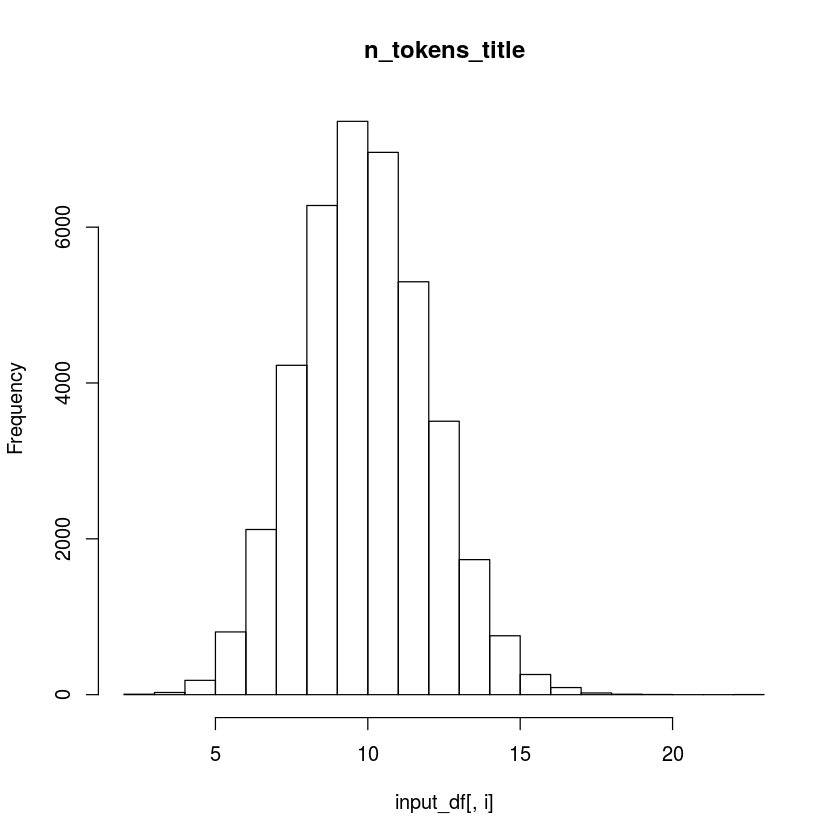

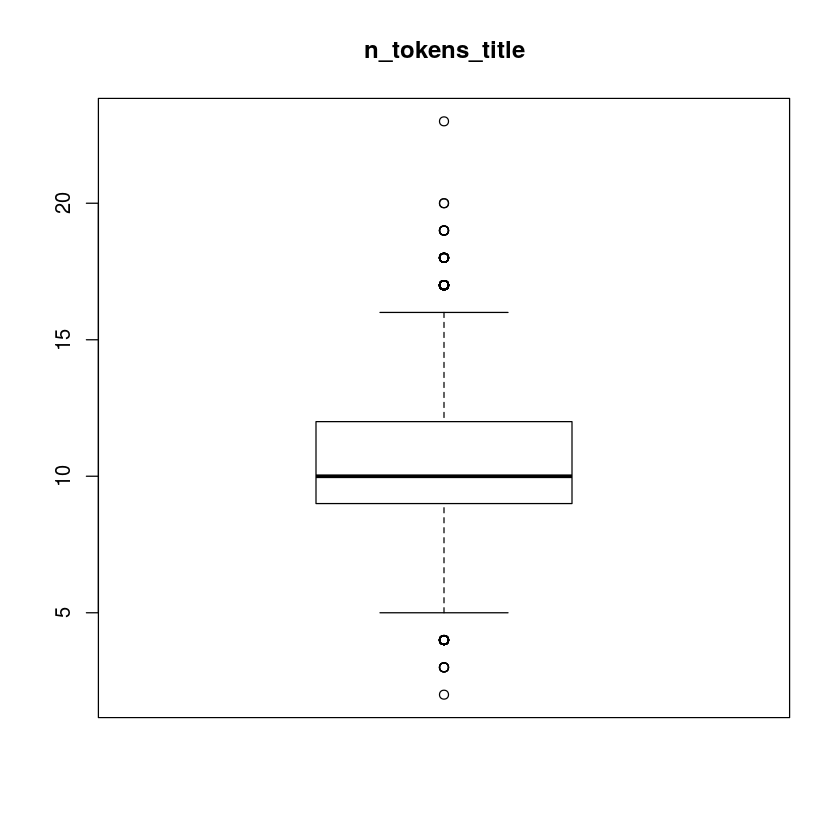

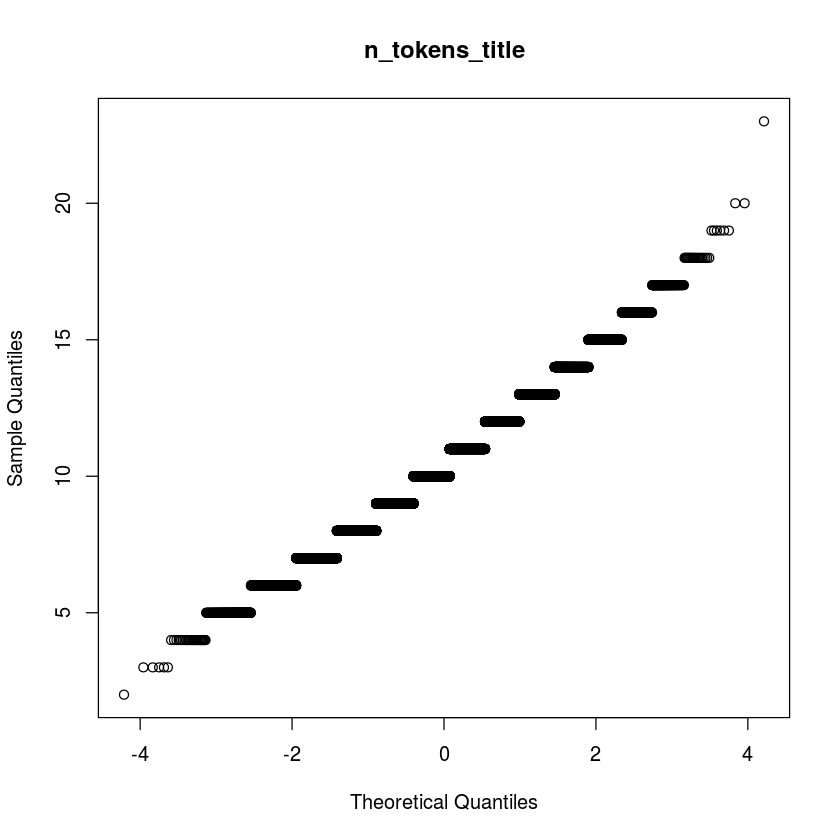

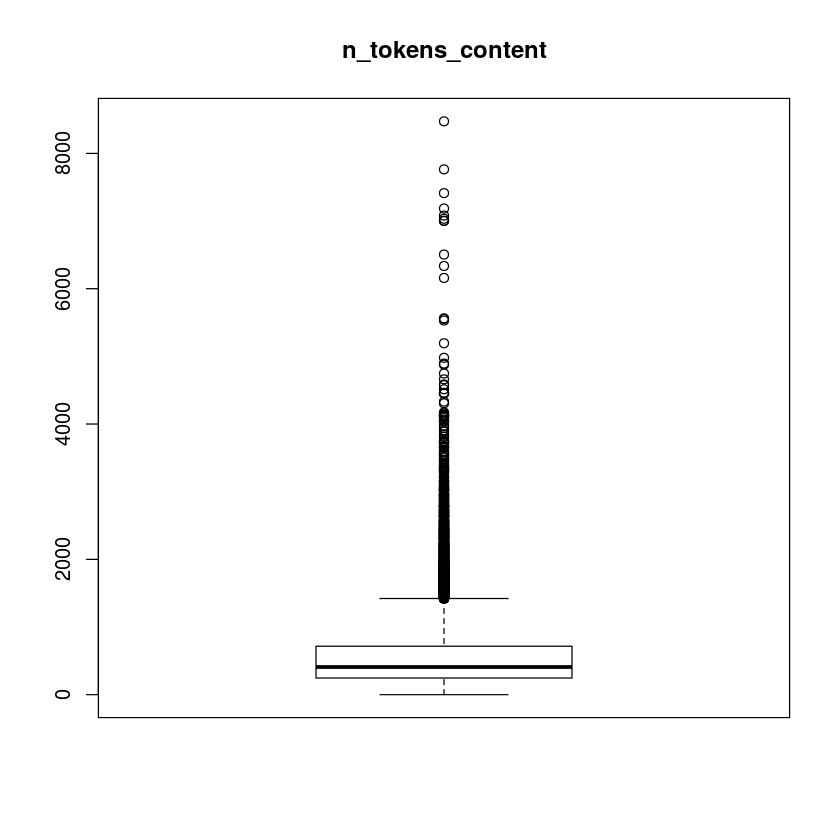

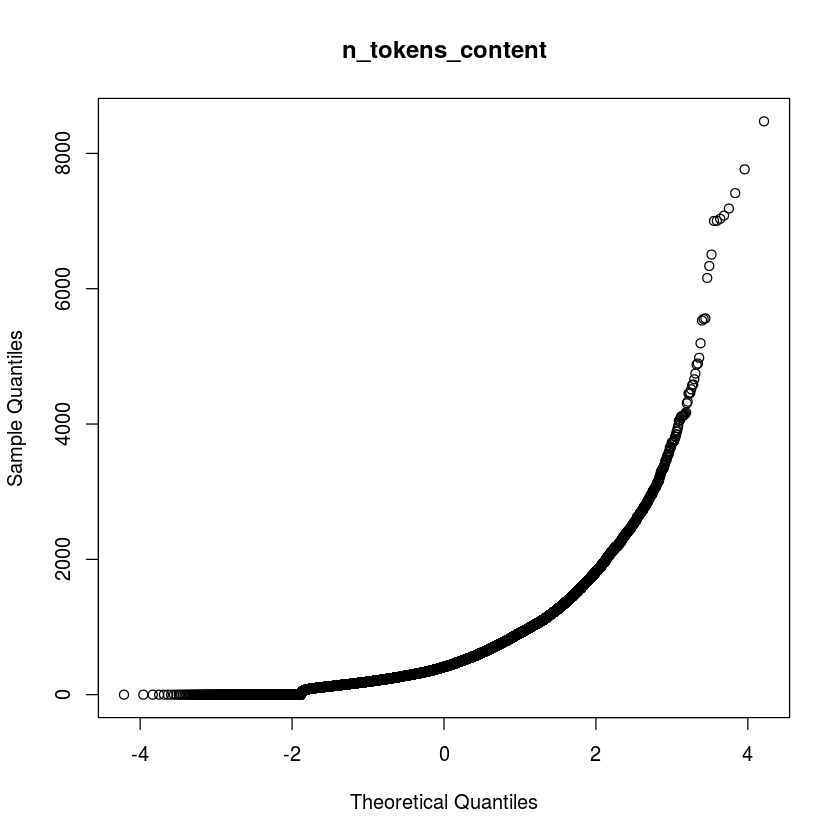

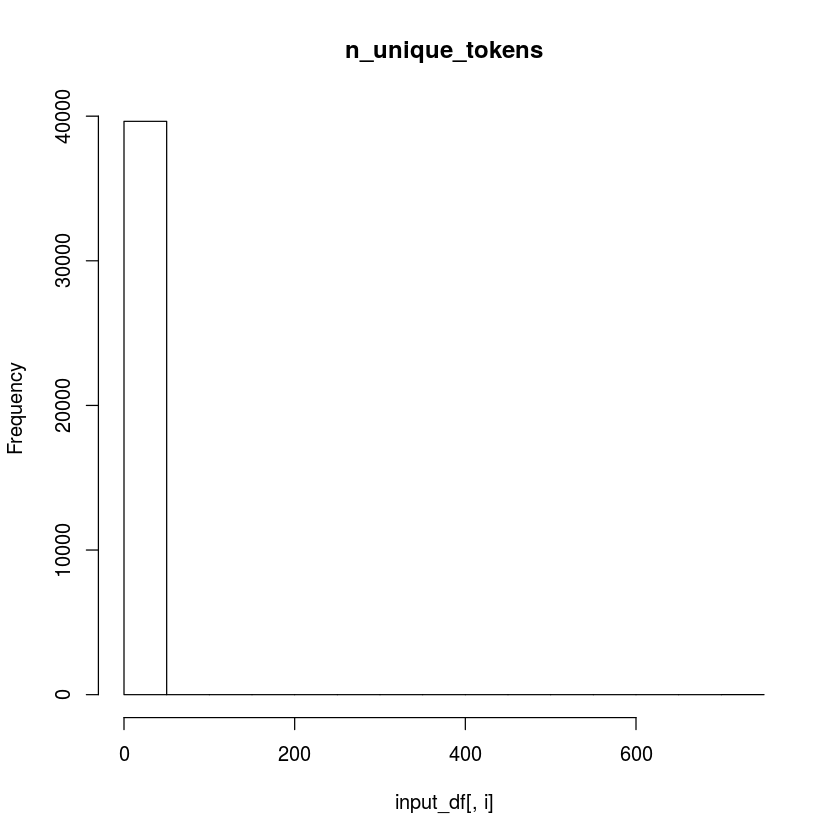

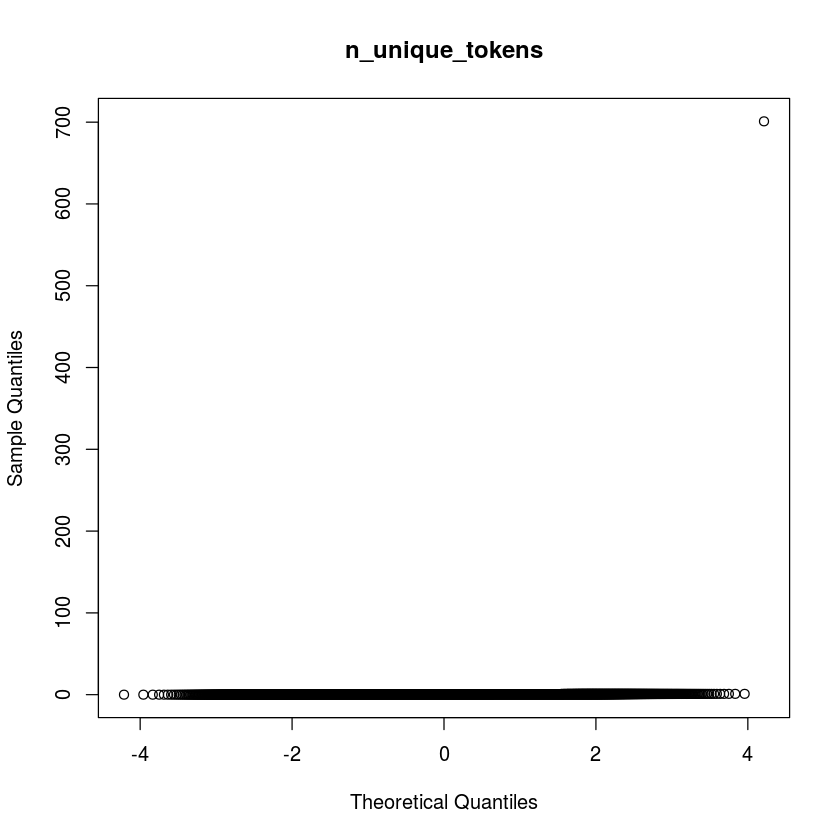

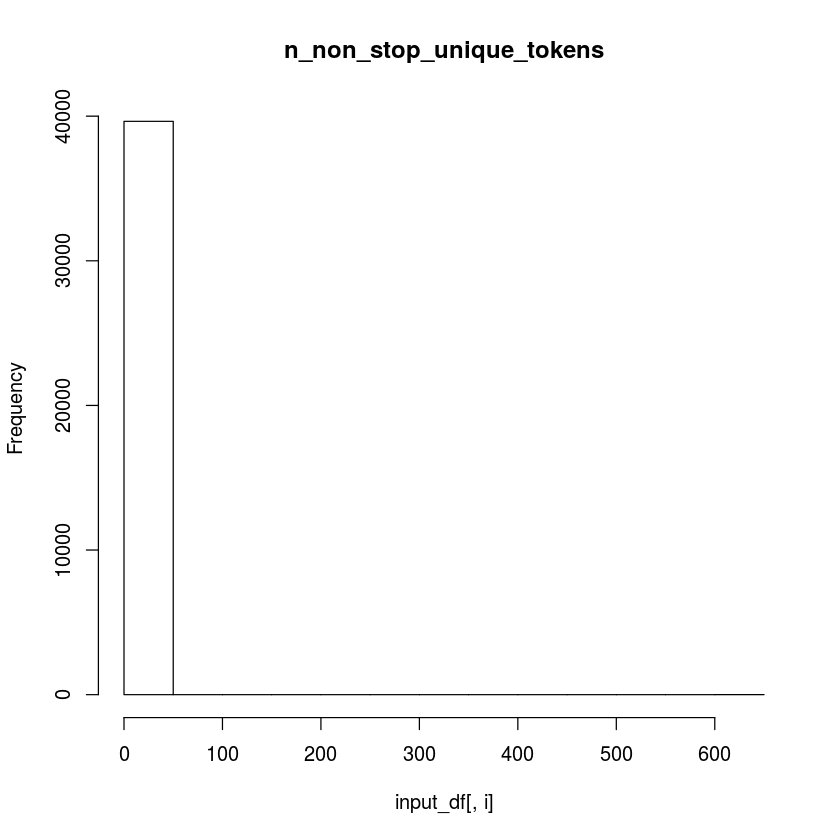

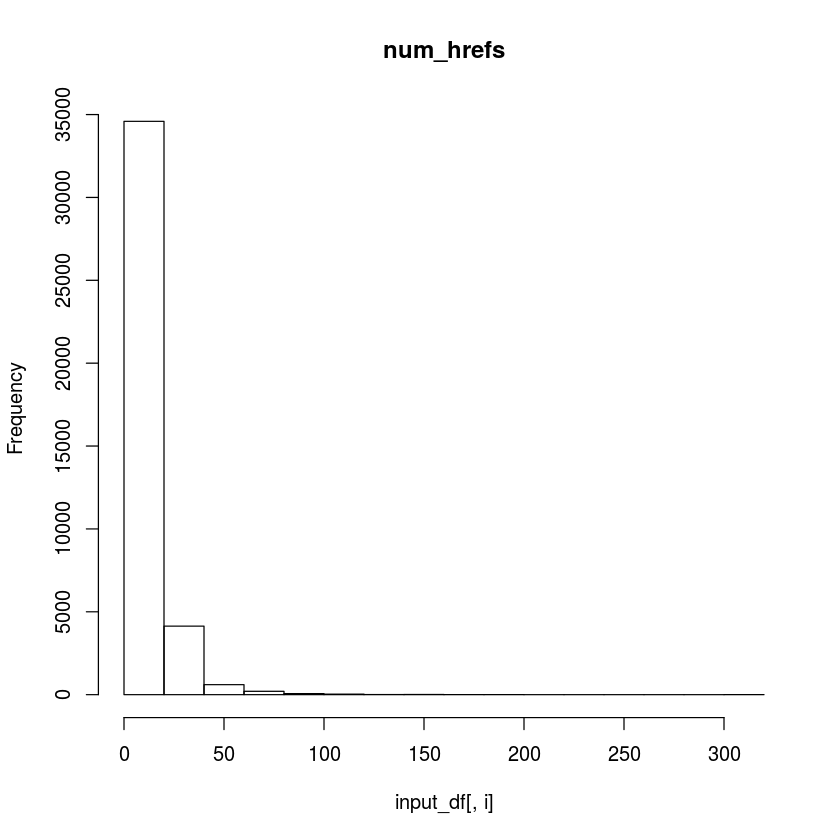

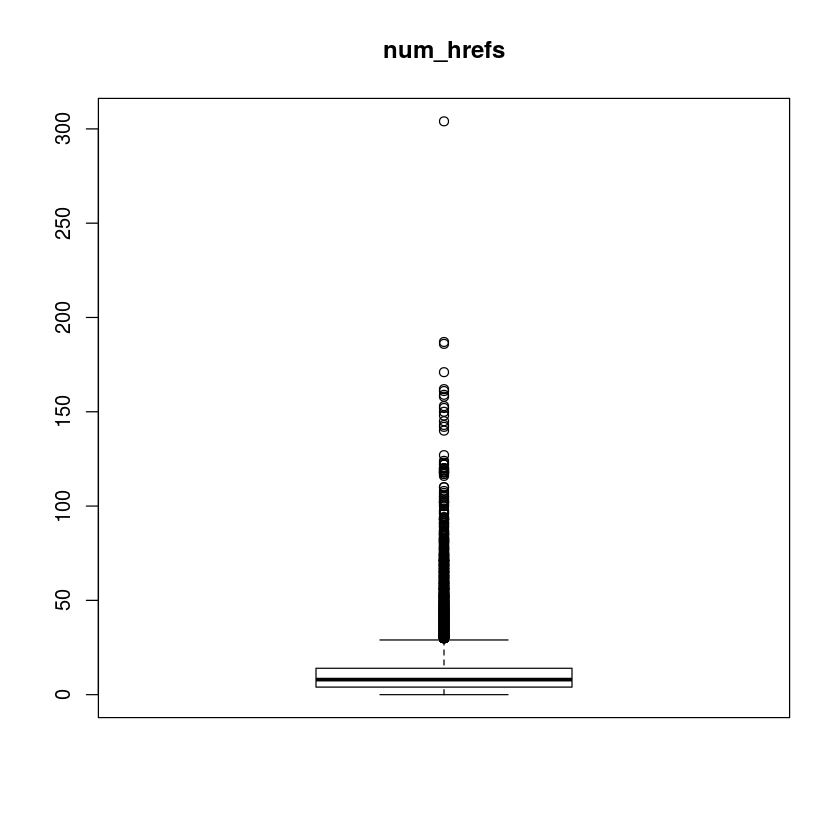

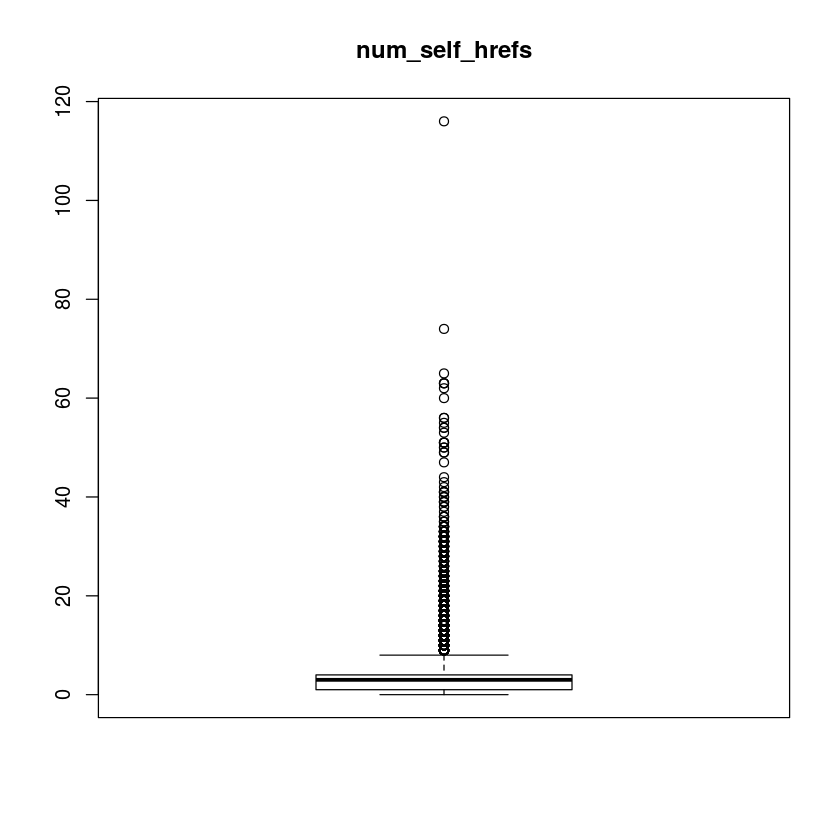

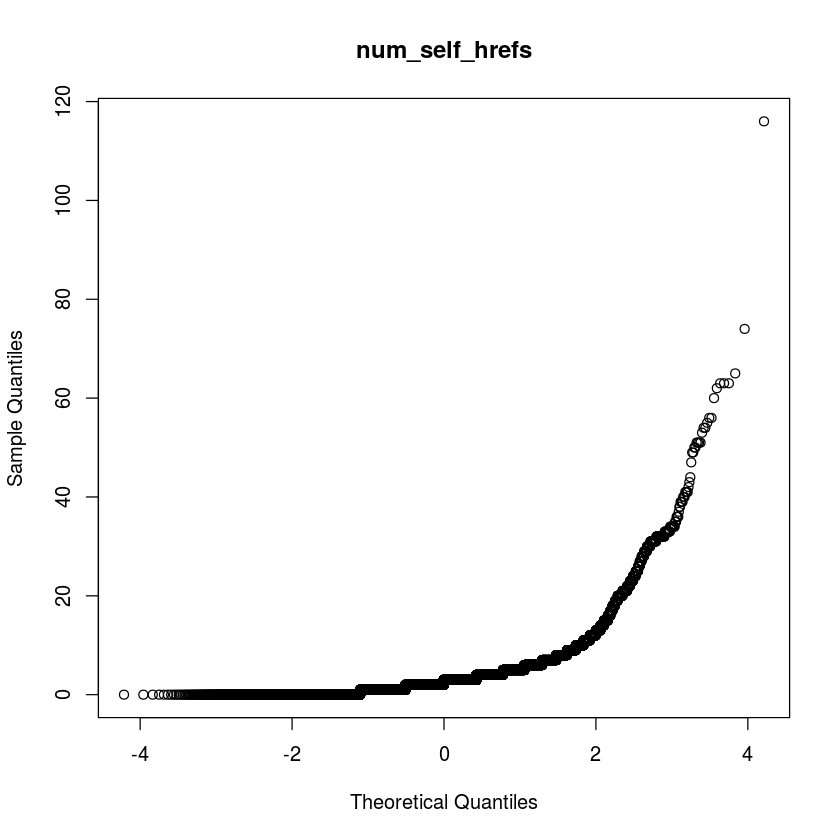

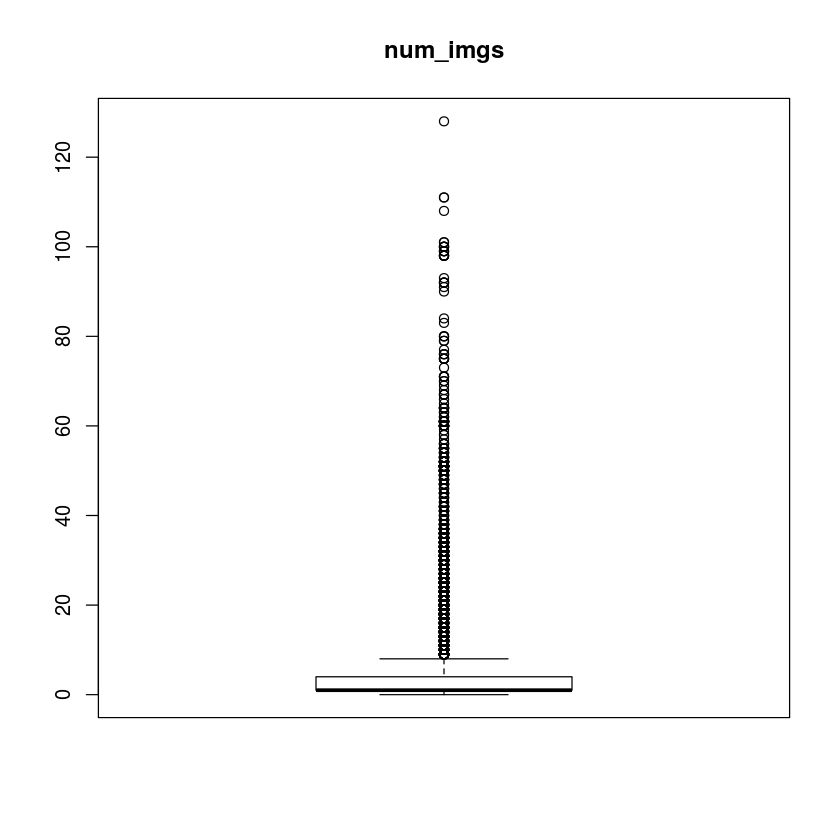

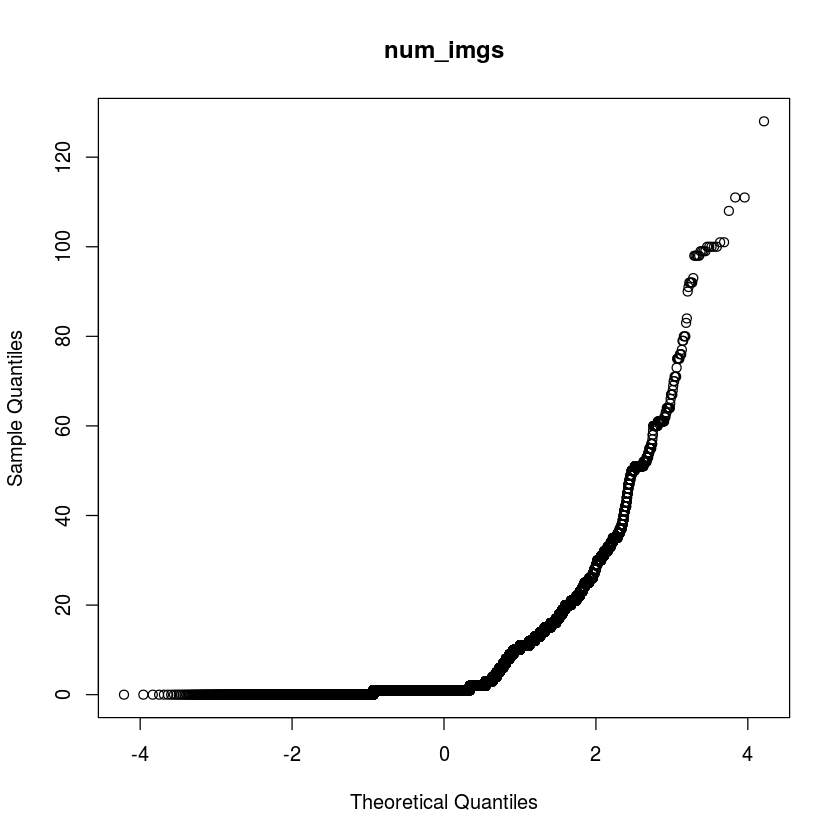

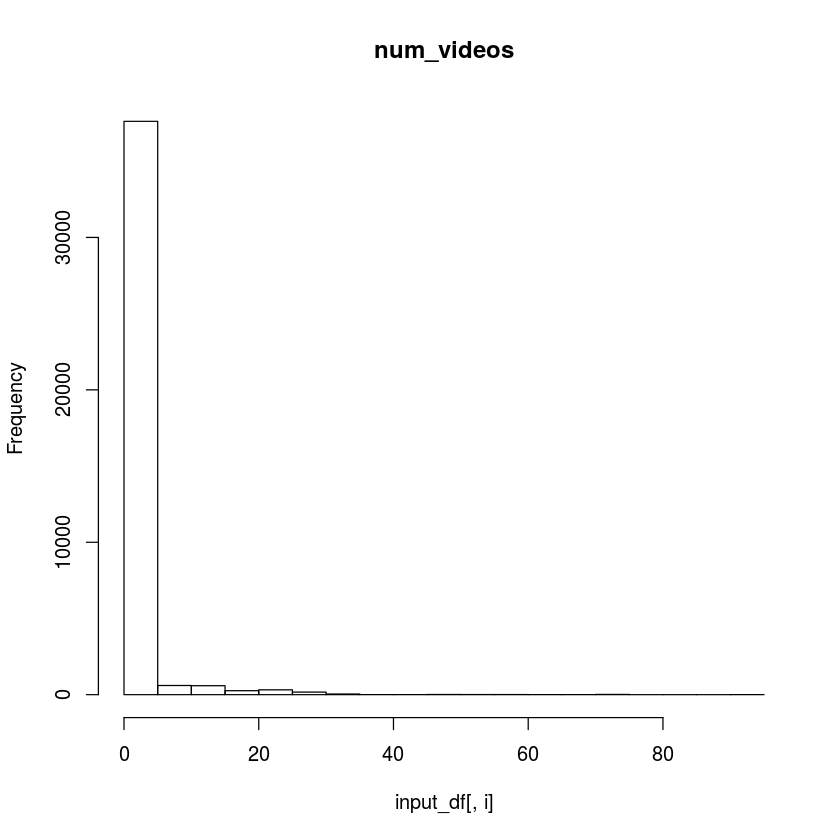

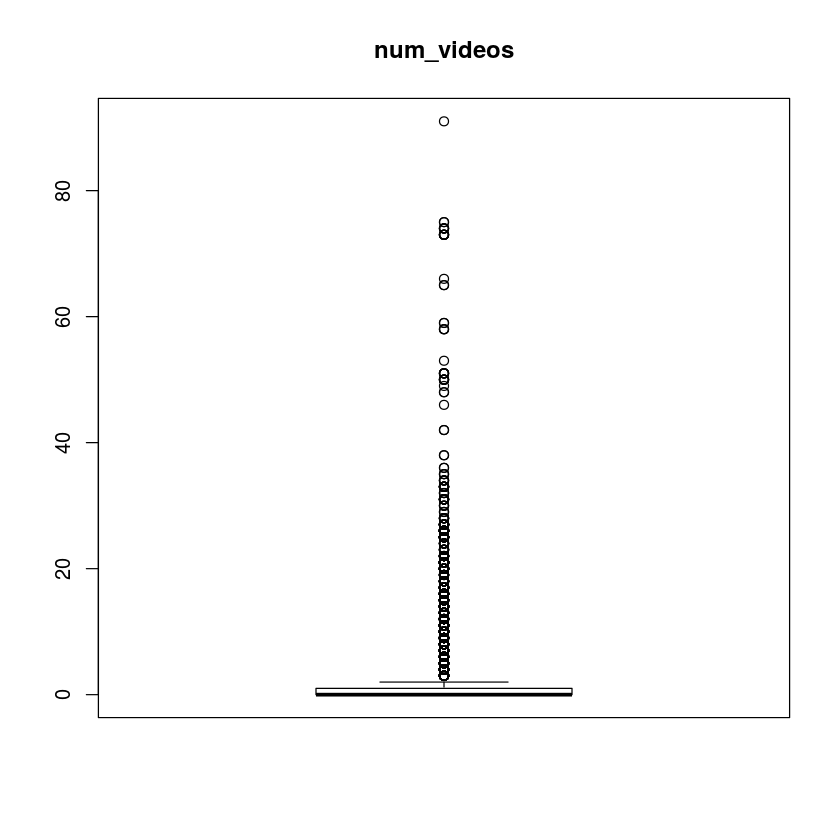

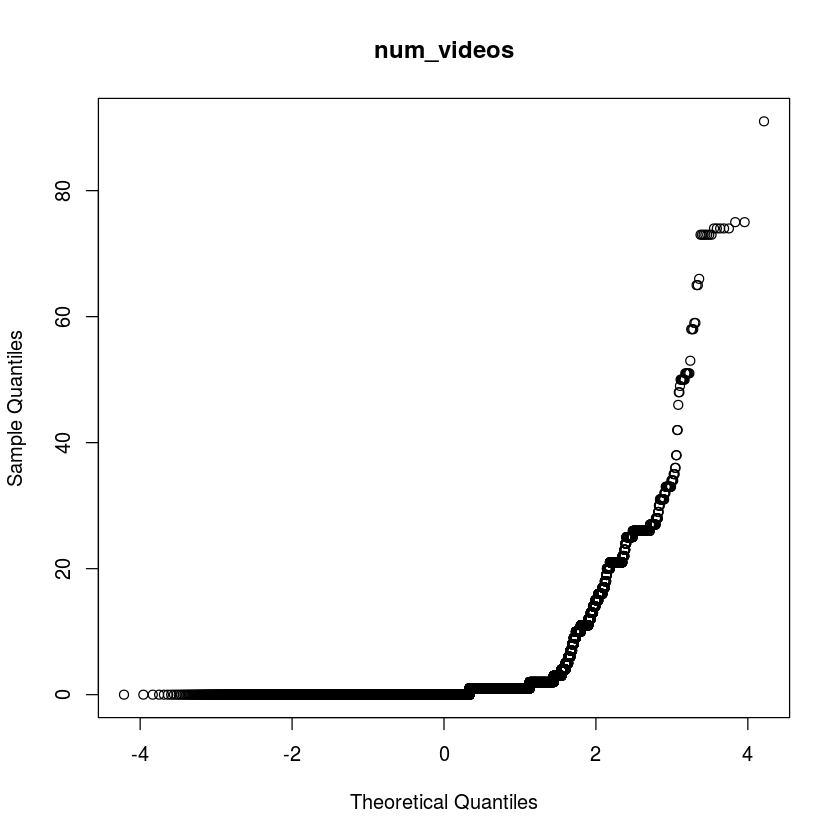

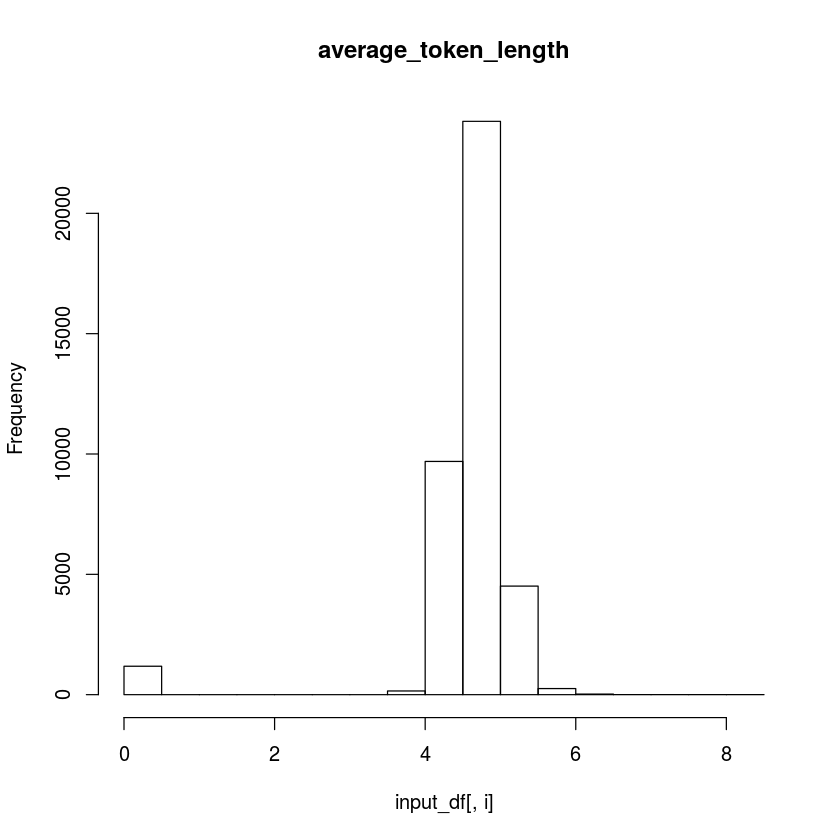

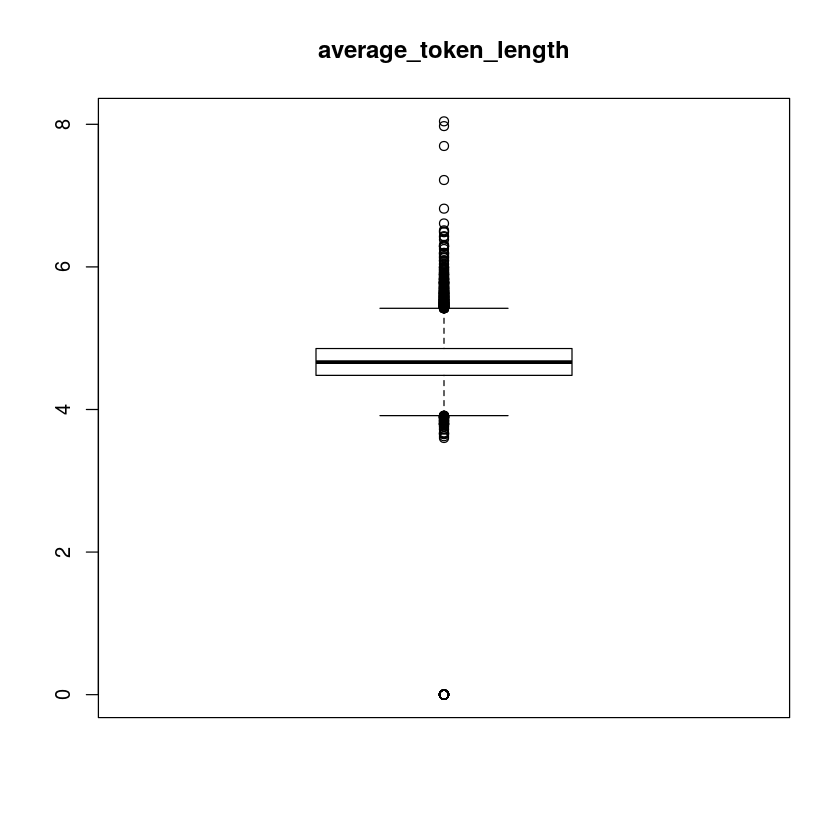

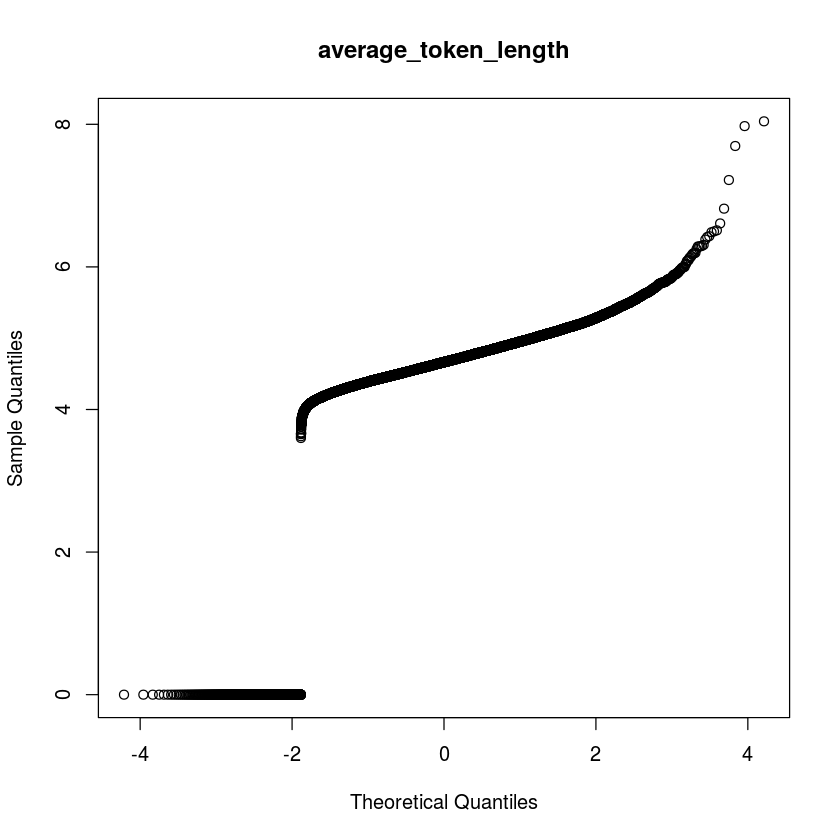

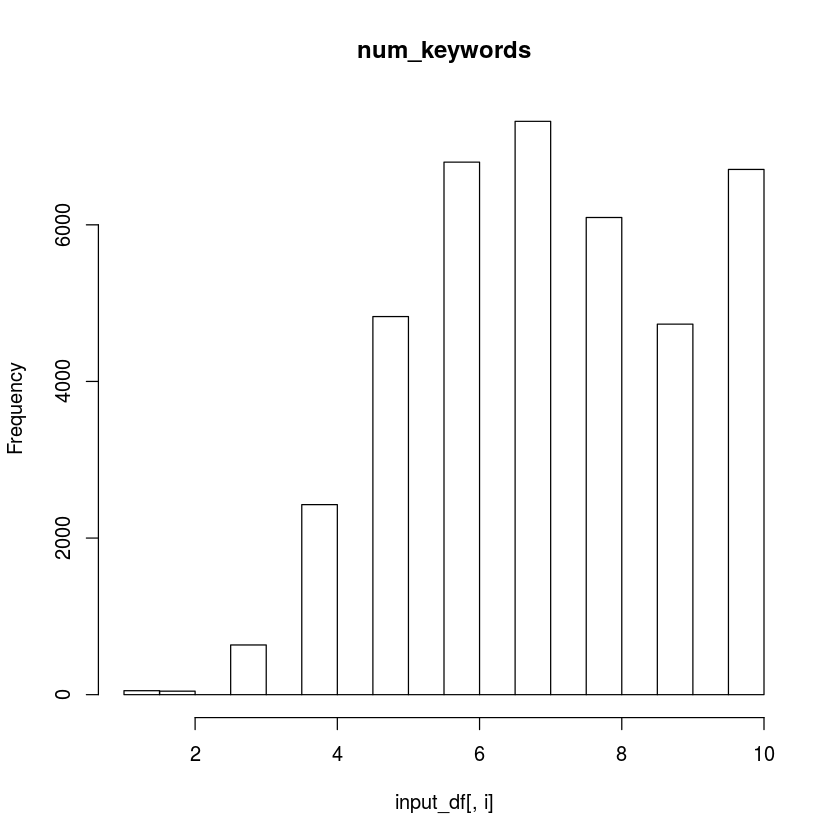

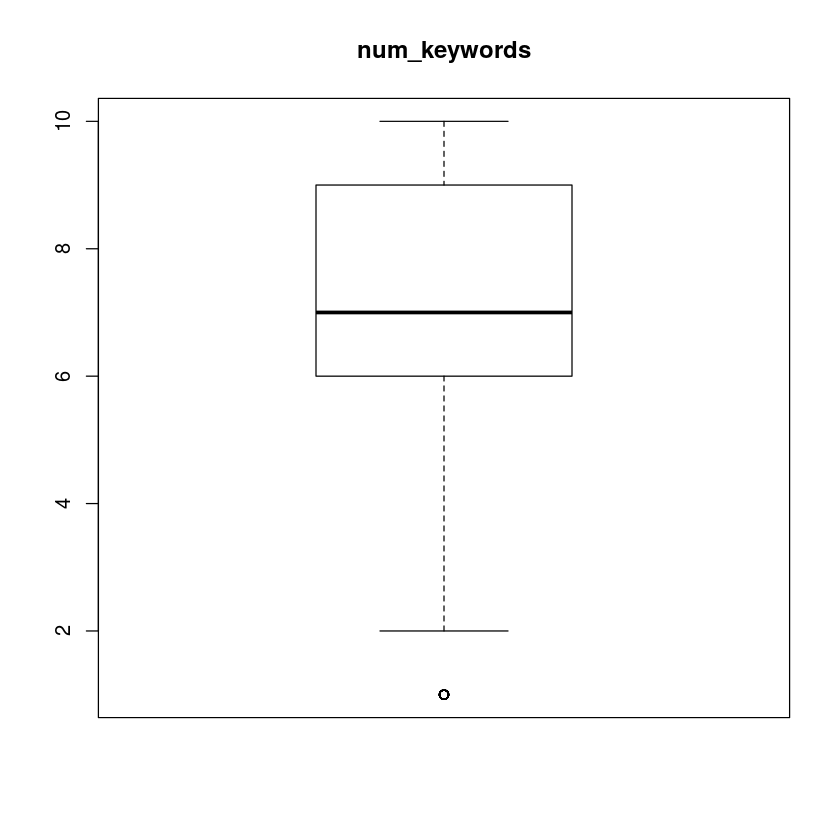

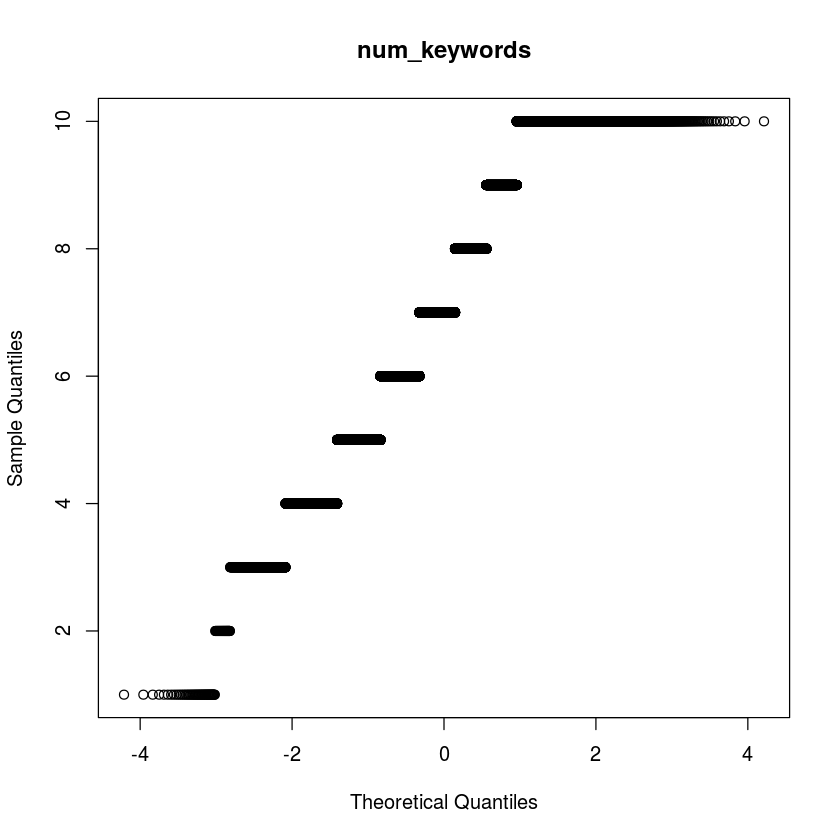

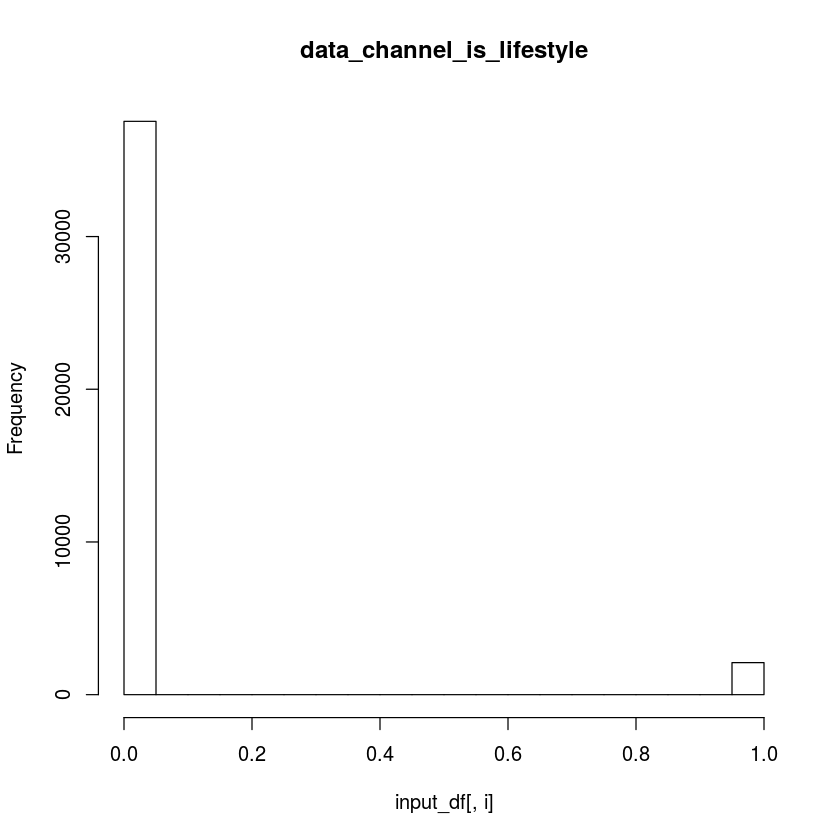

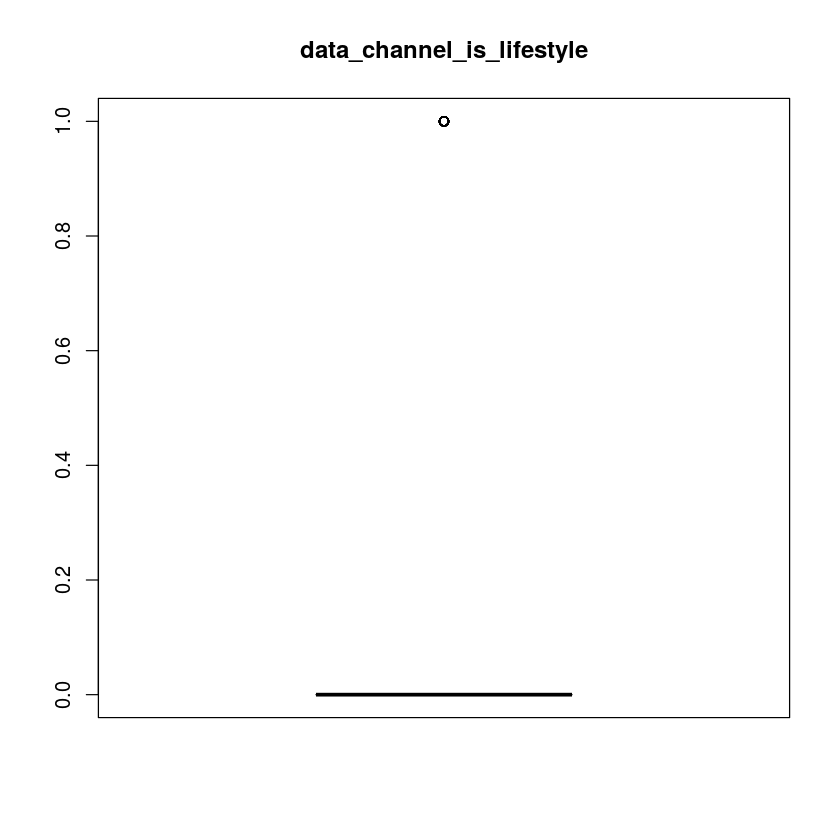

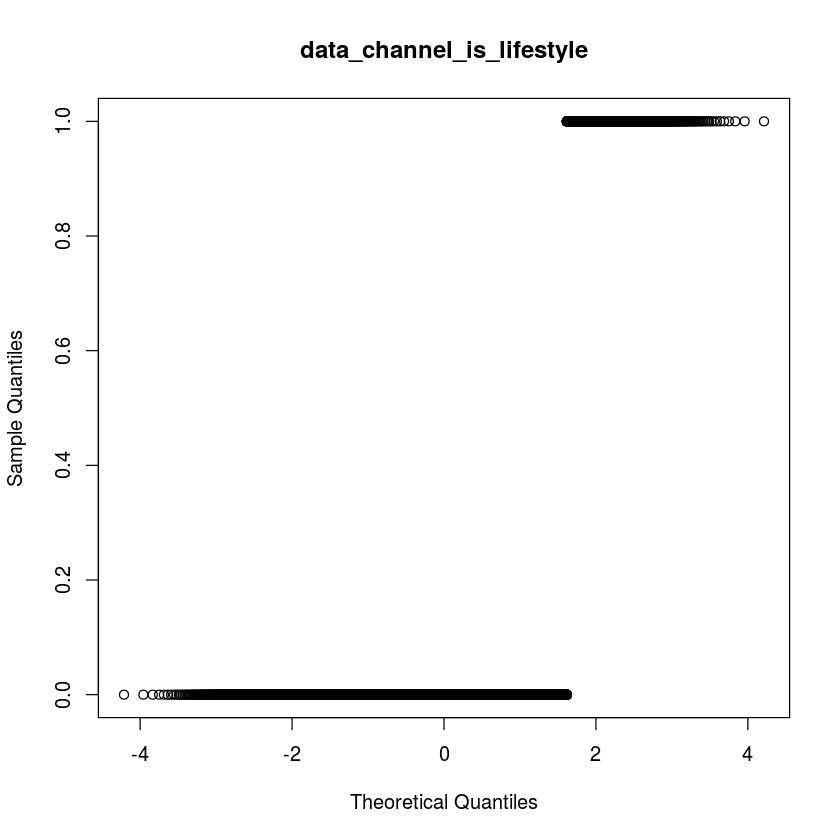

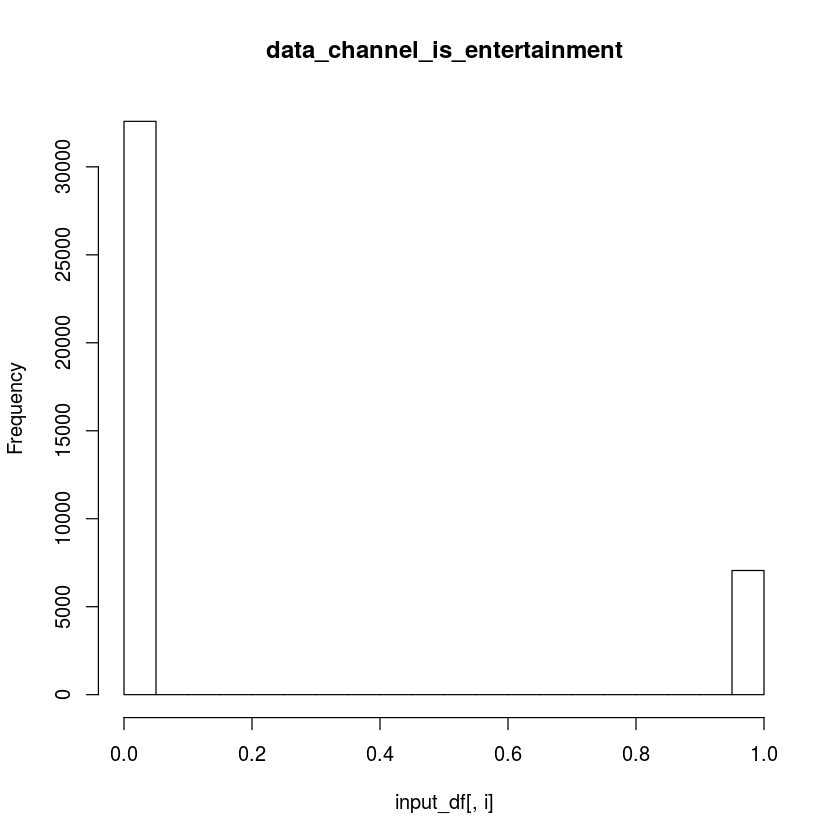

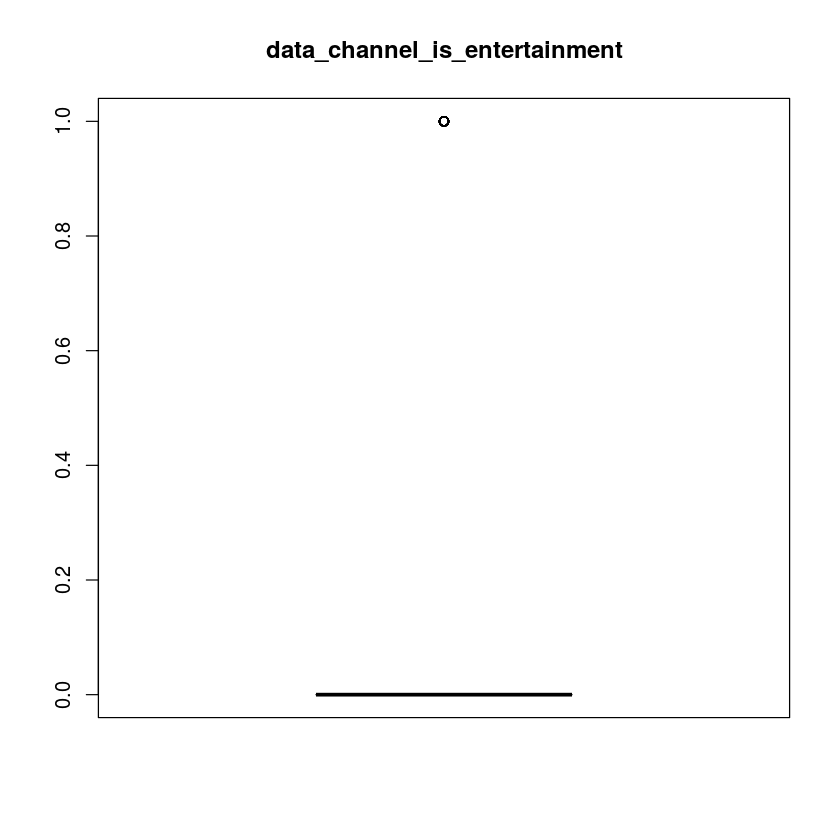

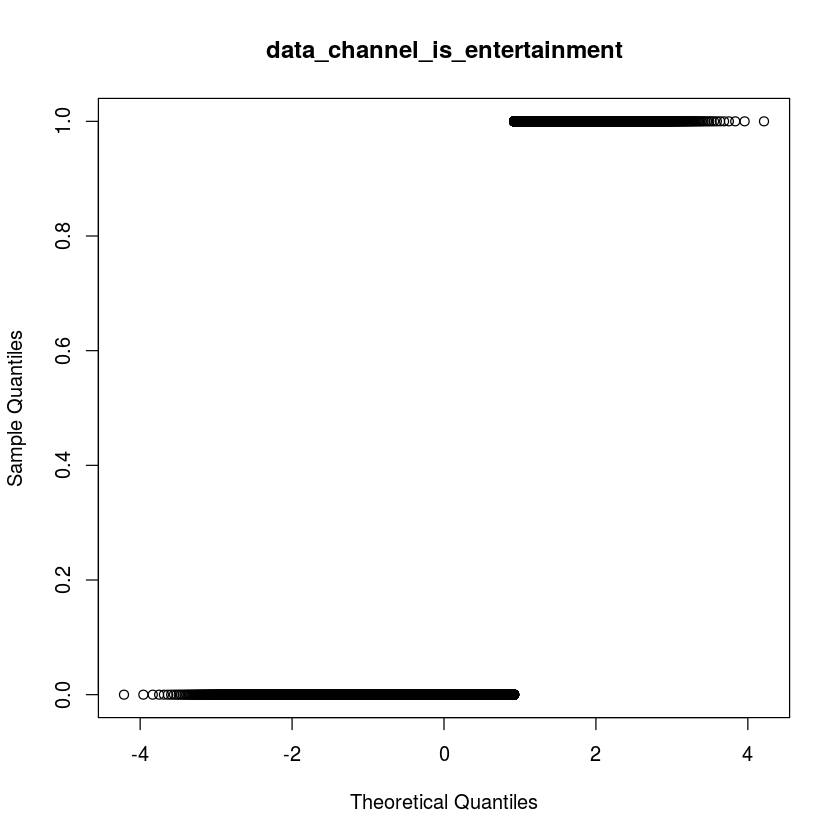

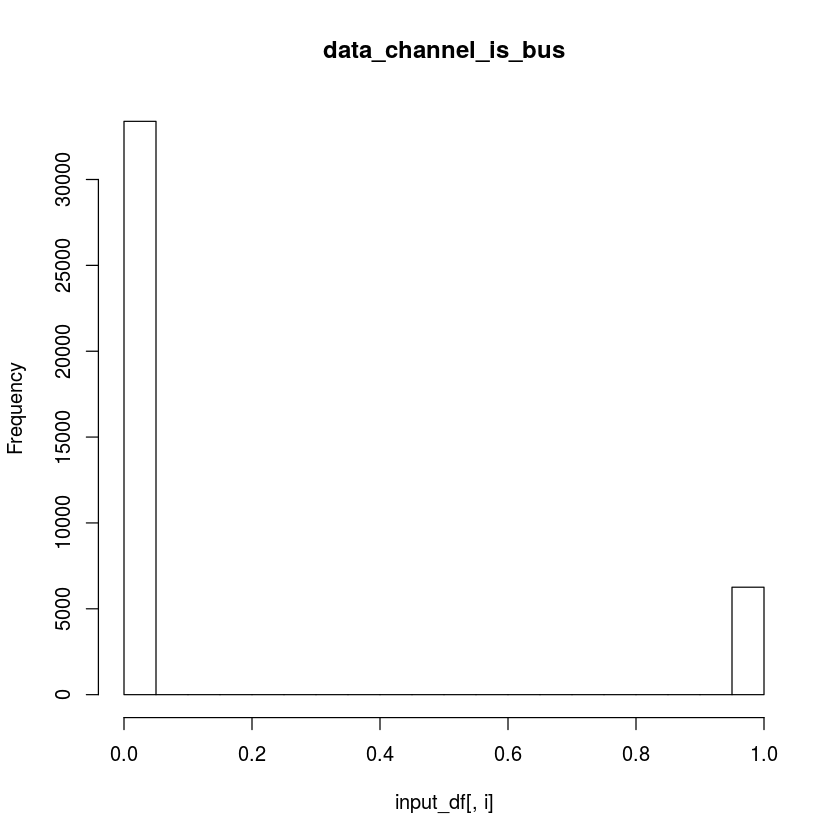

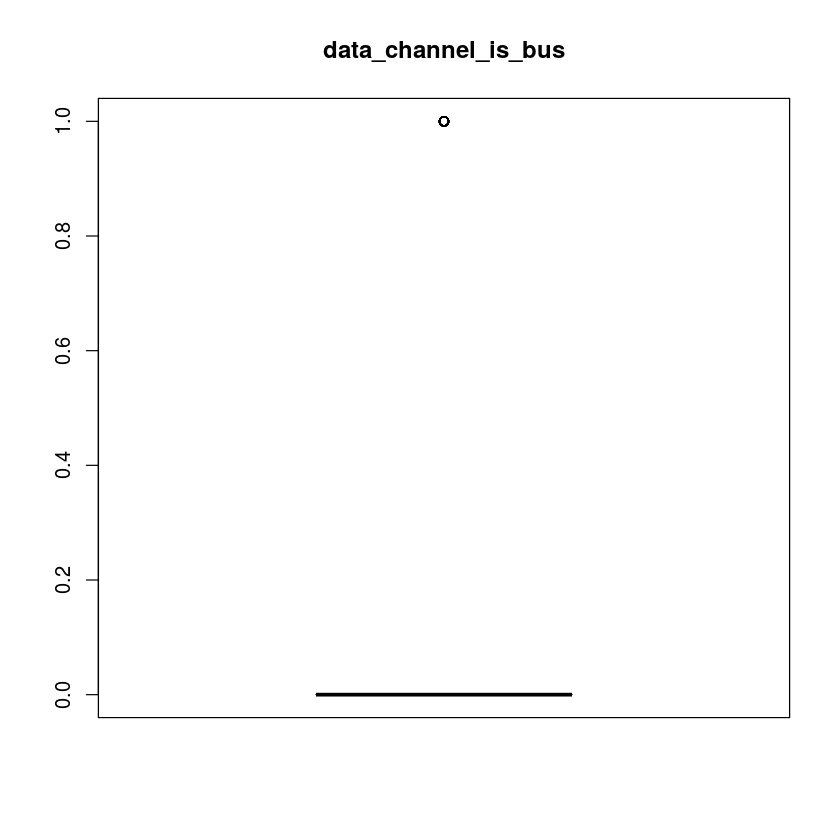

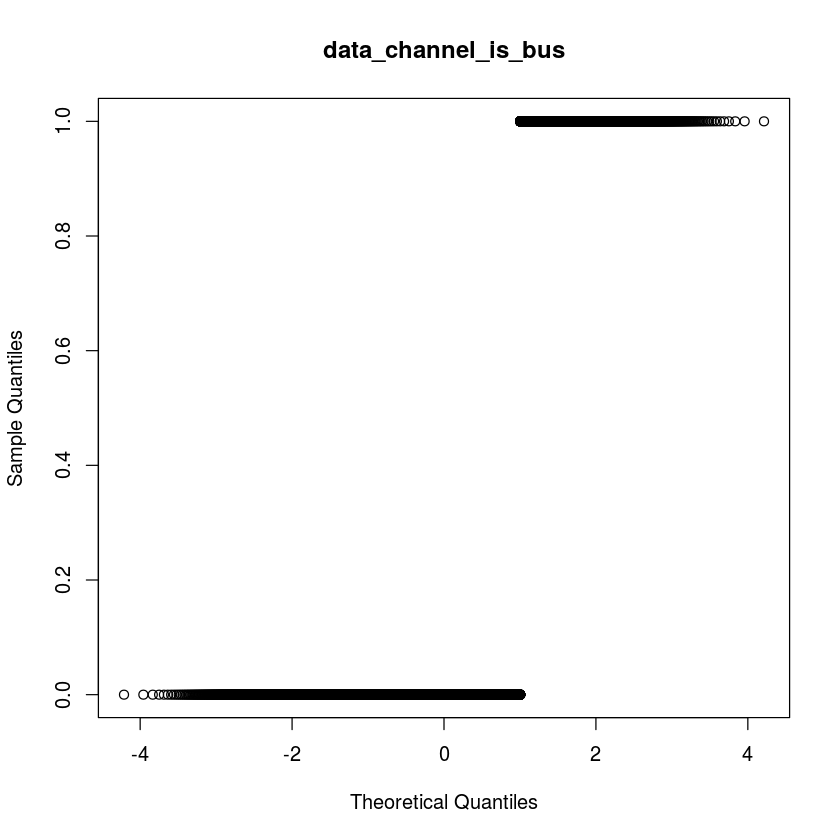

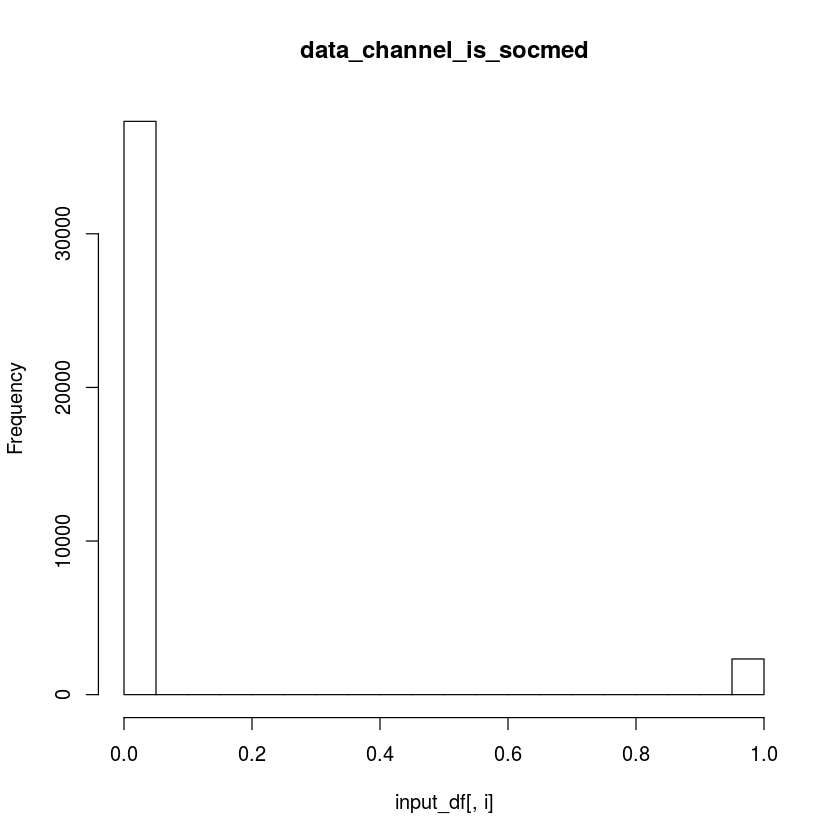

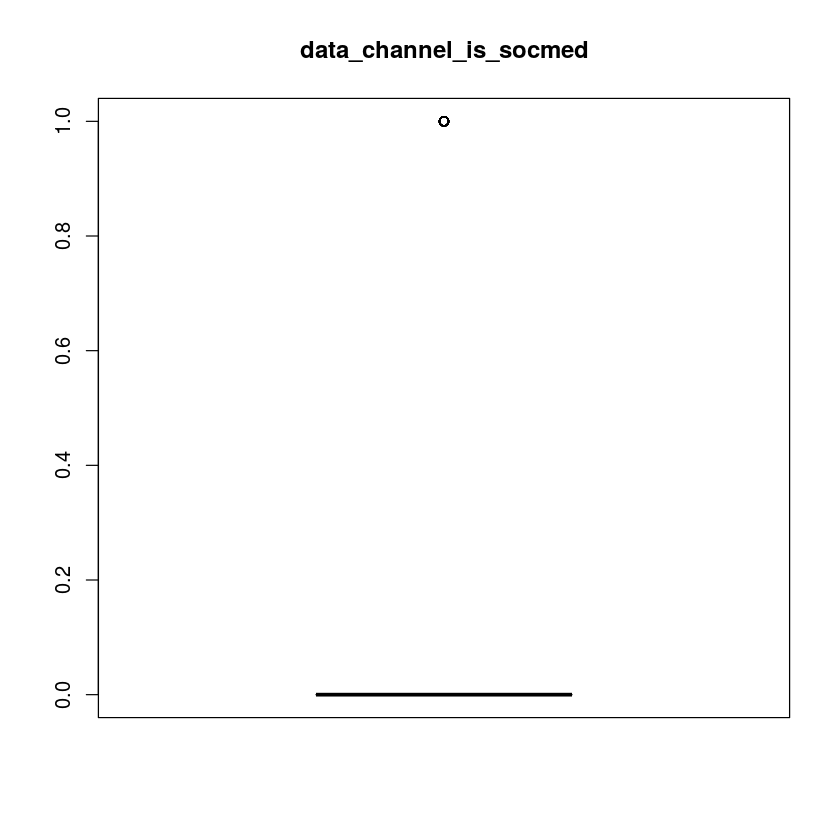

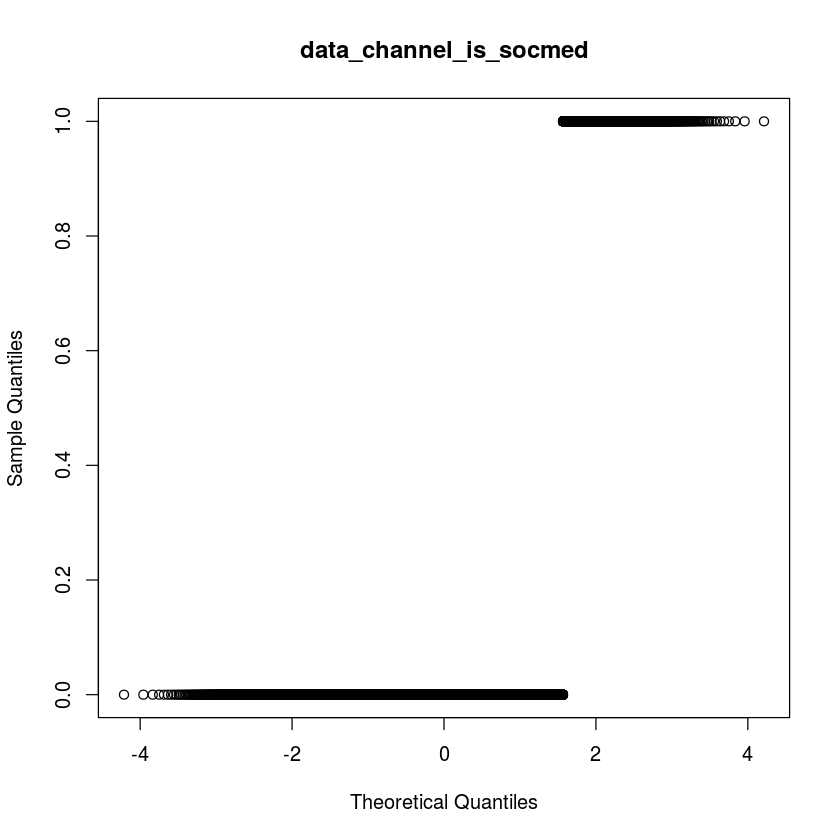

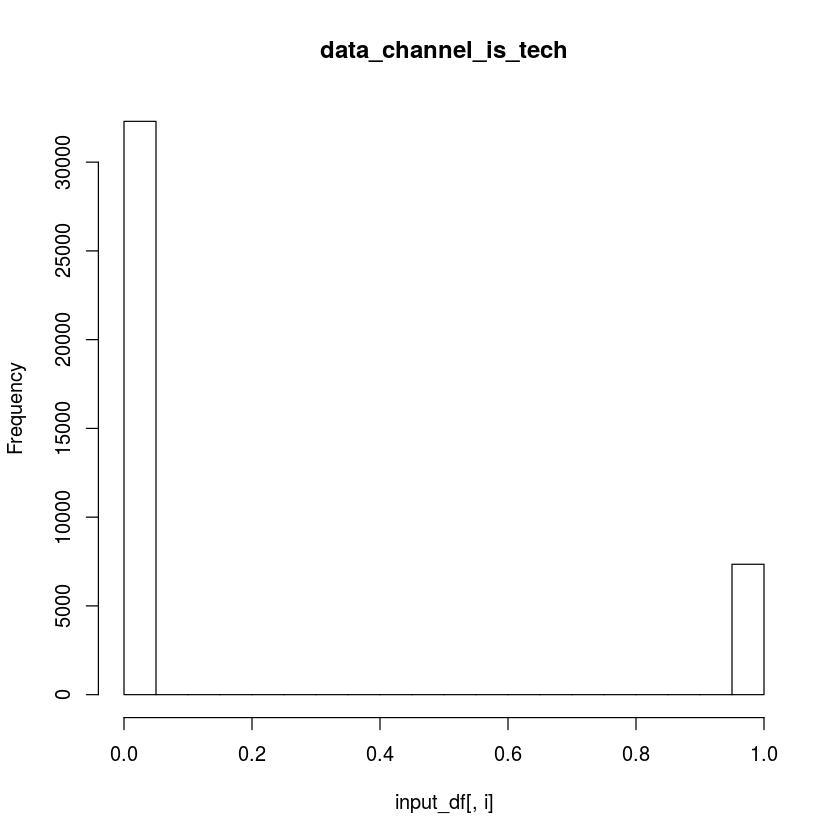

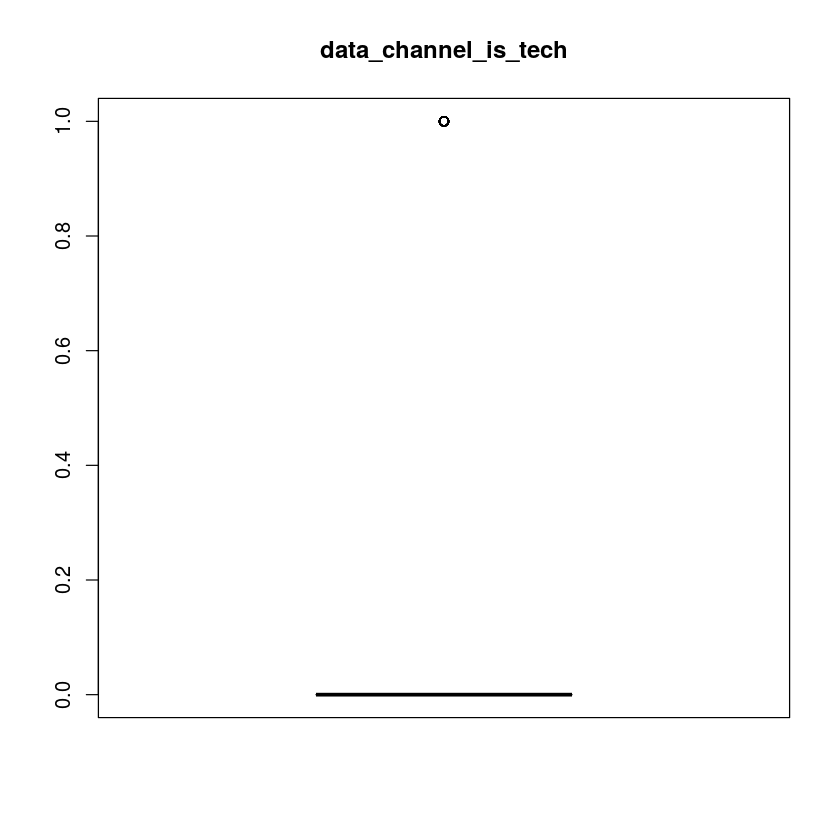

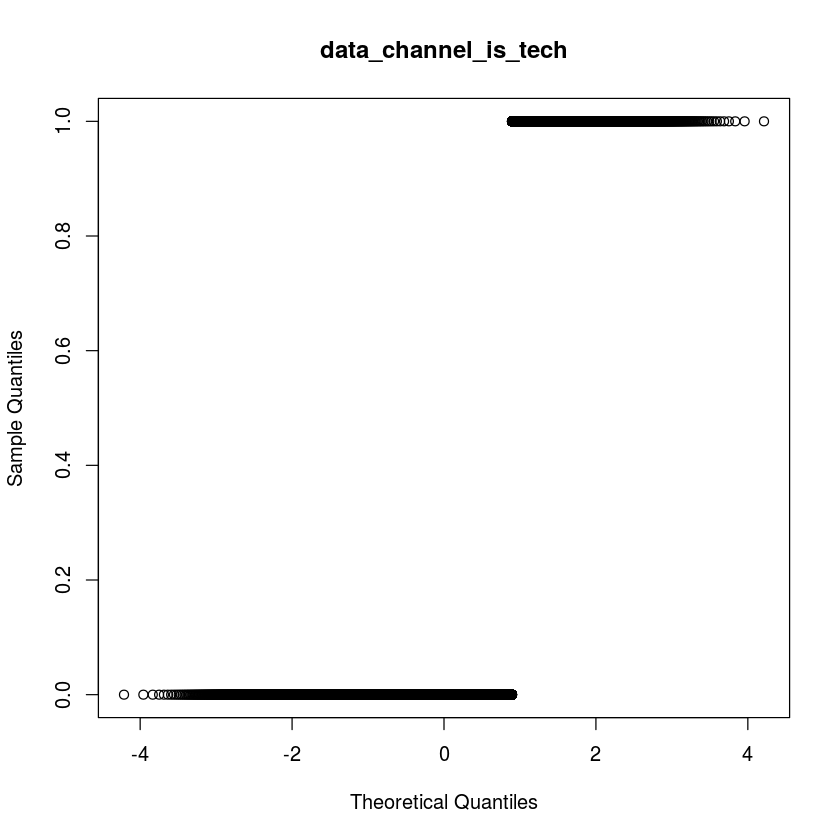

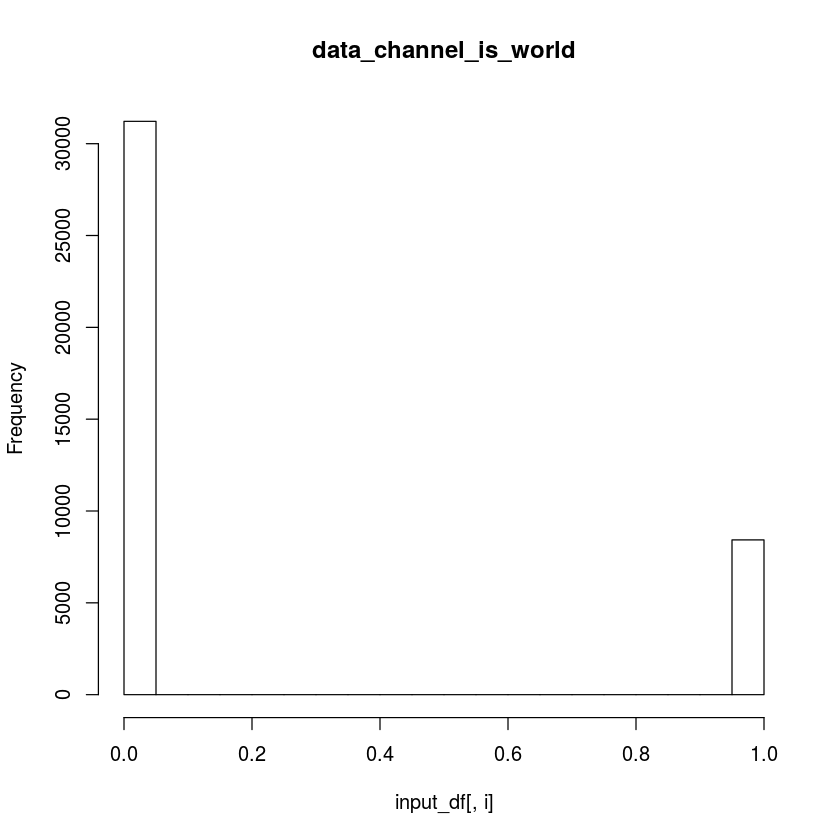

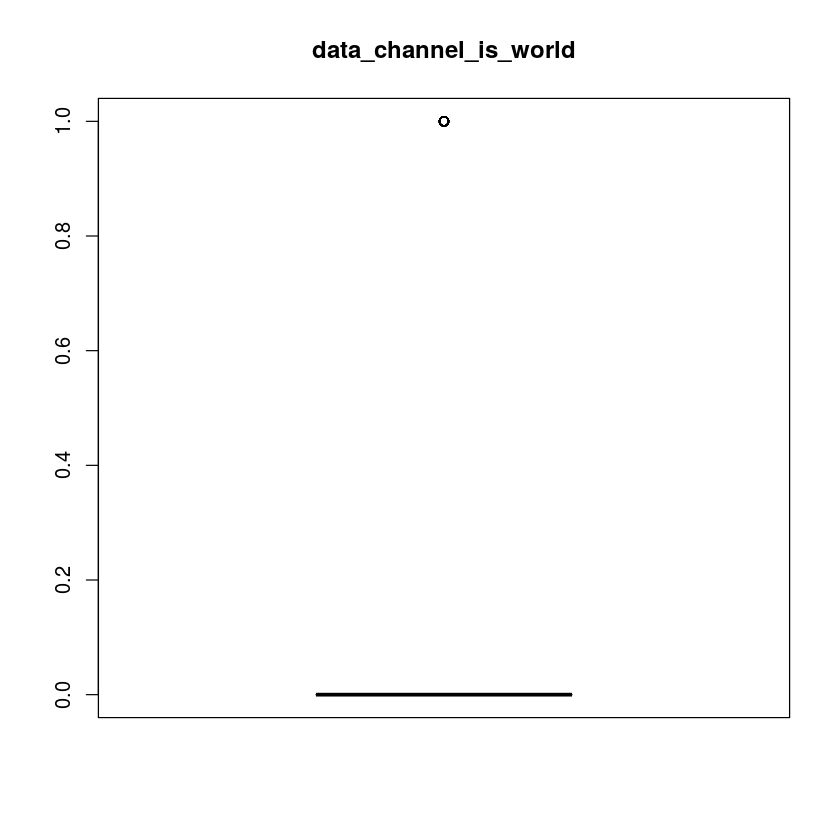

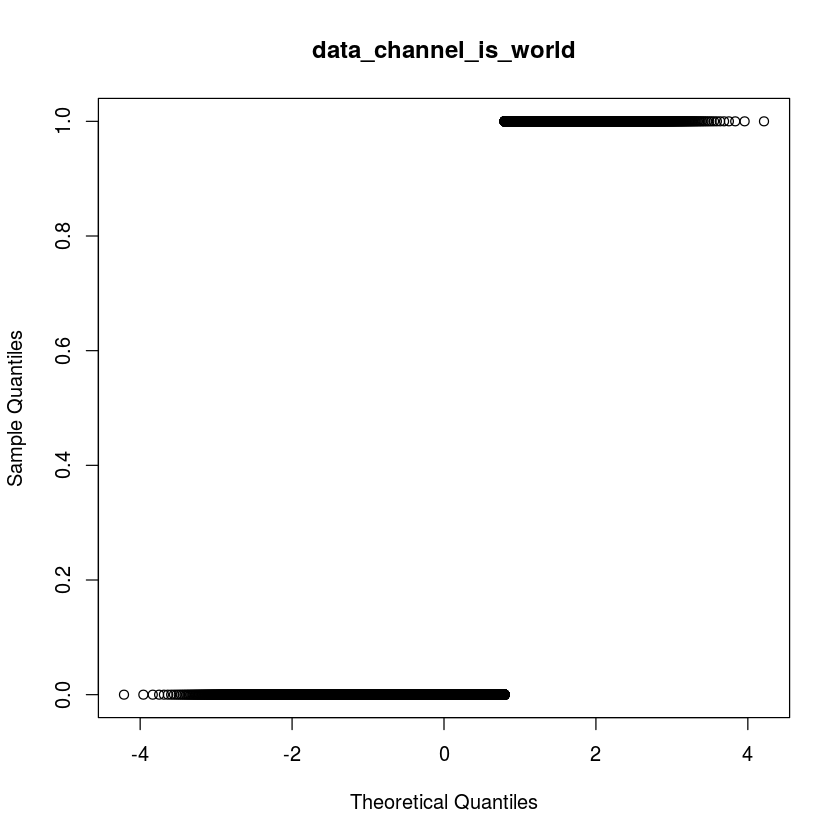

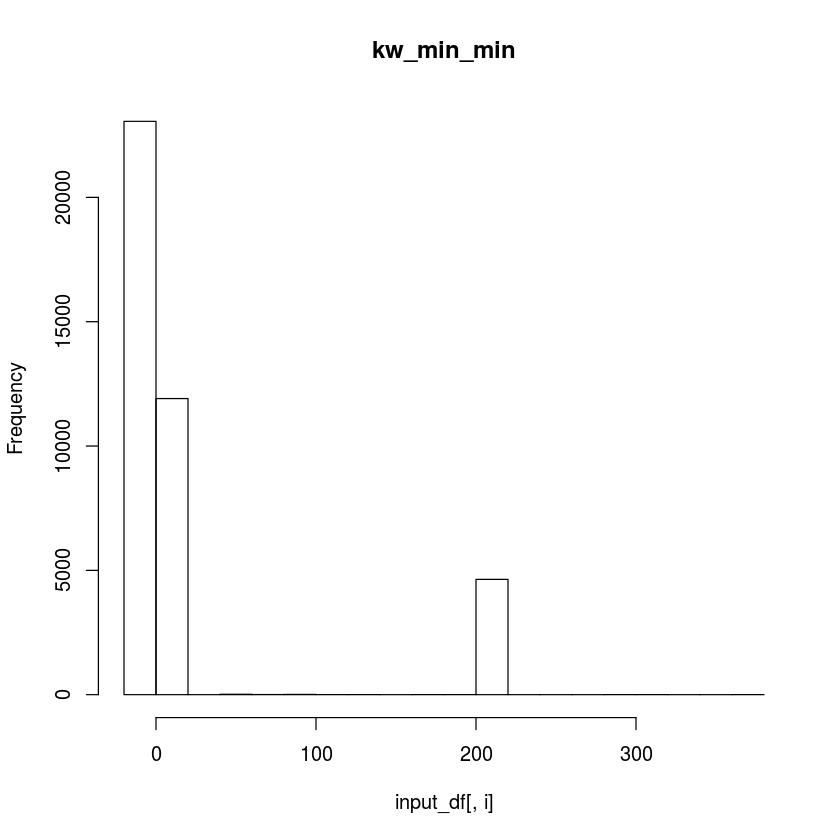

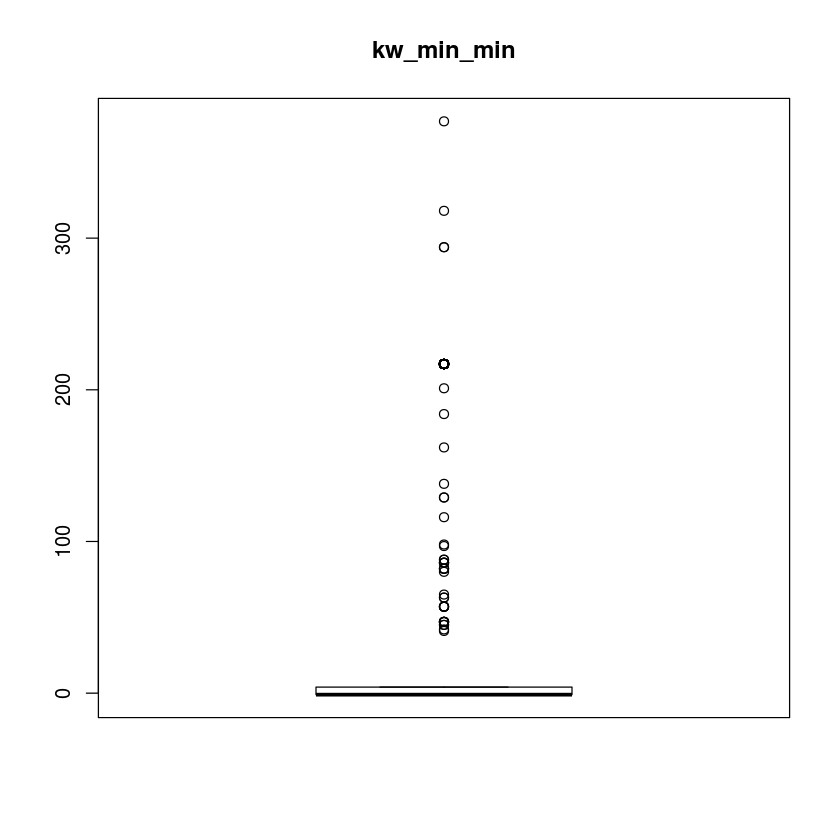

In [10]:
for(i in 1:length(input_df)){
    label=names(input_df[,i:(i+1)])[1]
    summary(input_df[,i])
    hist(input_df[,i],main=label)
    boxplot(input_df[,i],main=label)
    qqnorm(input_df[,i],main=label)
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     946    1400    3395    2800  843300 

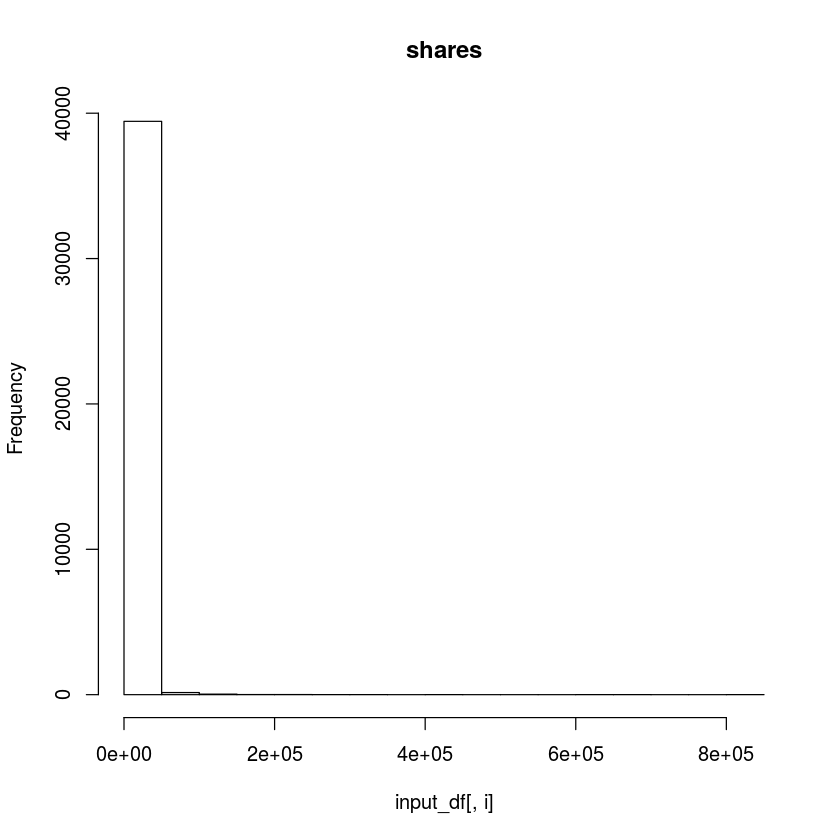

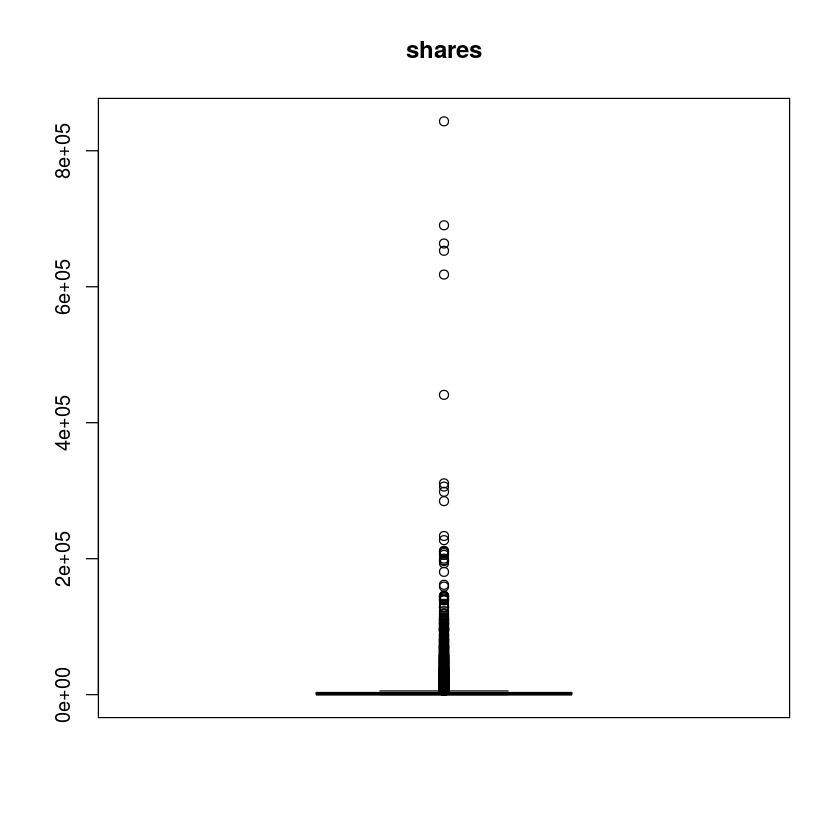

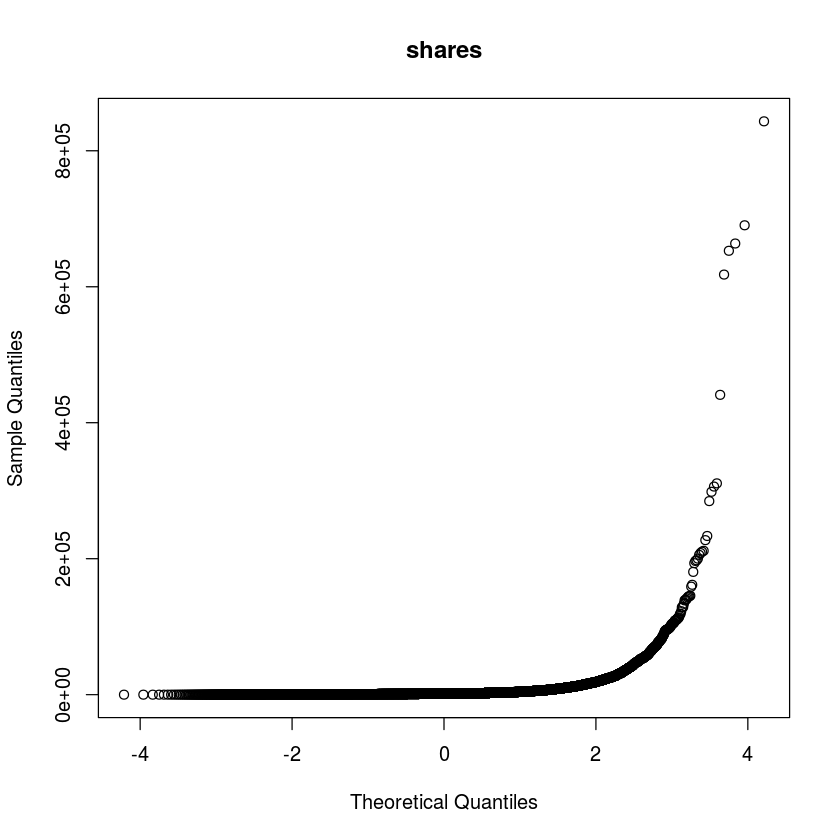

In [11]:
i = "shares"
label="shares"
summary(input_df[,i])
hist(input_df[,i],main=label)
boxplot(input_df[,i],main=label)
qqnorm(input_df[,i],main=label)


In [12]:
lapply(input_df, summary)

$n_tokens_title
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     9.0    10.0    10.4    12.0    23.0 

$n_tokens_content
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   246.0   409.0   546.5   716.0  8474.0 

$n_unique_tokens
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.4709   0.5392   0.5482   0.6087 701.0000 

$n_non_stop_words
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.0000    1.0000    1.0000    0.9965    1.0000 1042.0000 

$n_non_stop_unique_tokens
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.6257   0.6905   0.6892   0.7546 650.0000 

$num_hrefs
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    4.00    8.00   10.88   14.00  304.00 

$num_self_hrefs
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   3.294   4.000 116.000 

$num_imgs
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   4.544   4.000 128.000 

$num_videos
   Min. 1st Qu. 

#### So for this next column we have only 1 sample which is not 0, we must remove this column

#### Turns out that all the values are in range [0, 1] except one row which is 701. Correction, we must remove the outlier

In [13]:
count = 0
for(i in 1:nrow(input_df)){
    if(input_df[i, "n_unique_tokens"] > 1){
        count = count + 1
        print(input_df[i, "n_unique_tokens"])
        print(i)
    }
}
print(count)

[1] 701
[1] 31038
[1] 1


#### remove outlier

In [14]:
input_df[31038, "n_unique_tokens"]

[1] 701

In [15]:
input_df = input_df[-c(31038), ]

#### Now lets take a look at the n_non_stop_words feature:
    - It's a bool value
    _ We have to check what's the diversirty

In [16]:
count = 0
feature_curr = "n_non_stop_words"
for(i in 1:nrow(input_df)){
    if(input_df[i, feature_curr] > 0.5){
        count = count + 1
    }
}
positives_vals = count/length(input_df[,1])
print("Results about the positives outcomes:")
print(positives_vals)
print(count)

[1] "Results about the positives outcomes:"
[1] 0.9702091
[1] 38462


#### Lets expore the feature kw_max_min

In [17]:
print(input_df$kw_max_min)

    [1]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
    [8]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [15]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [22]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [29]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [36]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [43]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [50]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [57]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [64]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [71]      0.00      0.00      0.00      0.00      0.00      0.00      0.00
   [78]      0.00      0.00    504.00    504.00    462.00    593.00   1500.00
   [85]    761.00    536.00    761.00   5700.00    593.00    343

In [18]:
summary(input_df[,"kw_max_min"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     445     660    1154    1000  298400 

#### We could consider taking a couple of rows as outliers in this column, as they might be totaly bloating the feature with noise

In [19]:
count = 0
feature_curr = "kw_max_min"
for(i in 1:nrow(input_df)){
    if(input_df[i, feature_curr] > 100000){
        count = count + 1
        # print(input_df[,feature_curr])
    }
}
positives_vals = count/length(input_df[,1])
print("Results about the positives outcomes:")
print(positives_vals)
print(count)

[1] "Results about the positives outcomes:"
[1] 0.0002522513
[1] 10


#### Lets take a look at our target shares feature:

In [20]:
summary(input_df$shares)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     946    1400    3395    2800  843300 

In [21]:
# count = 0
# feature_curr = "shares"
# oulier_features = c()
# for(i in 1:nrow(input_df)){
#     if(input_df[i, feature_curr] > 10000){
#         count = count + 1
#         oulier_features[[i]] <- 
#     }
# }
# positives_vals = count/length(input_df[,1])
# print("Results about the positives outcomes:")
# print(positives_vals)
# print(count)

#### Maybe we should just drop 5% of our data
    - We could later apply the jacknife method to prove these rows are outliers but I think it's trivially intuitive that values 600 times bigger than the mean should have serious impact on the model

In [22]:
count = 0
feature_curr = "shares"
outlier_list = c()
for(i in 1:nrow(input_df)){
    if(input_df[i, feature_curr] > 10000){
        count = count + 1
        outlier_list <- append(outlier_list, i) 
    }
}
positives_vals = count/length(input_df[,1])
print("Results about the positives outcomes:")
print(positives_vals)
print(count)

#print(outlier_list)

[1] "Results about the positives outcomes:"
[1] 0.05511692
[1] 2185


#### Deleting the outliers

In [23]:
working_shares_trim_df = input_df[-outlier_list,]

     2. n_tokens_title:                Number of words in the title
             - We will use this features as it's normaly distributed
             
     3. n_tokens_content:              Number of words in the content
             - Exponentially distributed, could be useable
             
     4. n_unique_tokens:               Rate of unique words in the content
             - Looked very bad but when outlier is removed, data looks normaly distributed in range [0.4;1]
     
     5. n_non_stop_words:              Rate of non-stop words in the content
             - Looks like feature is a bool value
             - 97% of cases is positive, maybe we should remove this feature as it might not give much value, would be good if we check the correlation however
       
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
         - Features is compareable with "4. n_unique_tokens" - look normal in range [0.4;1]
         
                                       
     7. num_hrefs:                     Number of links
         
         - Looks Exponentially distributed;
         - Might not be the best feature
         - 
     
     
     
     
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos

        - Same as 7.num_hrefs
        
    11. average_token_length:          Average length of the words in the
        
        - Looks normaly distributed in range [4;6]
        - Could remove the outliers in rows with values 0
    
    
                                       content
    12. num_keywords:                  Number of keywords in the metadata
        - Looks normaly distributed, definetely viable option as a feature in our model
        
        
        
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
        
        - Binary features, not normally distributed but some of them might have a solid correlation with the shares
            * it might turn out for instance that people who read more tech news share more 
    
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
        - We have to check for trivial outliers
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
        Same as kw_max_min
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)

        
        - At least one of these features should be represented
        - We could use the avg_avg as it's the most normaly distributed looking one
        
        
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
    
    - propably use the feat 30, but have to check correlation as well
    
    
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    
    
    [31-38] These features form a matrix which is very sparse, no matter their lack of consistency, they might have perfect for fit for our model. 
    
    
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    
    [39-43] We could just create a new feature using PCA out of these ones, as these features are not subjectly obligating
    
    
    44. global_subjectivity:           Text subjectivity 
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content    
        - Normaly distributed feature, should be good for our model
                     !!!
 
 
    47. global_rate_negative_words:    Rate of negative words in the content
    
        - Same as above but we might have to remove the outliers
        
        
        
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    
        - [48-49] Could use these features as well
              
              
              
    50. avg_positive_polarity:         Avg. polarity of positive words
        - Normaly distributed, should be able to use it
    
    51. min_positive_polarity:         Min. polarity of positive words
        - Exponentialy distributed, could be worth it if we test it
        
        
    52. max_positive_polarity:         Max. polarity of positive words
        - Has not outliers
        - could have a good outcome
        
        
    53. avg_negative_polarity:         Avg. polarity of negative  words
        - Looks normaly distributed
        - Could have outliers in the lower limit
    
    54. min_negative_polarity:         Min. polarity of negative  words
        - Have to check correlation
        - Looks like a very good and stable feature
    
    55. max_negative_polarity:         Max. polarity of negative  words
        - Similar to previous
        - Not as good as 54.
    
    56. title_subjectivity:            Title subjectivity
        - Although it's weak 0 spot, could have some nice results
    
    57. title_sentiment_polarity:      Title polarity
        - Must check correlation, could be very good/could be very bad
        - QQplot and hist lead me to normality
        - box plot show volatileness
        
        
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
        - needs more investigation
    
    60. shares:                        Number of shares (target)
        - plots look very bad
        - mean is 3395, Max is 843300. There might be some serious outliers that are the reason of the poor $R^2 score$
    

#### Another baseline model to check progress:

In [24]:
baseline_model = lm(shares~., data=working_shares_trim_df)
summary(baseline_model)


Call:
lm(formula = shares ~ ., data = working_shares_trim_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8729.2  -973.0  -511.7   304.3  9059.0 

Coefficients: (3 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1.335e+03  1.355e+02   9.854  < 2e-16 ***
n_tokens_title                 6.274e-01  4.335e+00   0.145 0.884939    
n_tokens_content               8.676e-02  3.425e-02   2.533 0.011315 *  
n_unique_tokens               -3.449e+01  2.917e+02  -0.118 0.905895    
n_non_stop_words               1.734e+01  8.702e+02   0.020 0.984100    
n_non_stop_unique_tokens      -1.768e+02  2.477e+02  -0.714 0.475371    
num_hrefs                      6.334e+00  1.035e+00   6.119 9.51e-10 ***
num_self_hrefs                -1.614e+01  2.693e+00  -5.993 2.08e-09 ***
num_imgs                       3.821e+00  1.371e+00   2.788 0.005308 ** 
num_videos                     2.438e+00  2.440e+00   0.9

#### We have scaled up a lot but it's still very low

    - It could be a big problem that our label is volatile, we could consider using jack knife to remove some more rows, which are potential noise

#### Lets try to visualy represent the correlation between the features and the target variable
    - None of the samples look correlated.
    - Lets try with real correlation to see which features are correlated

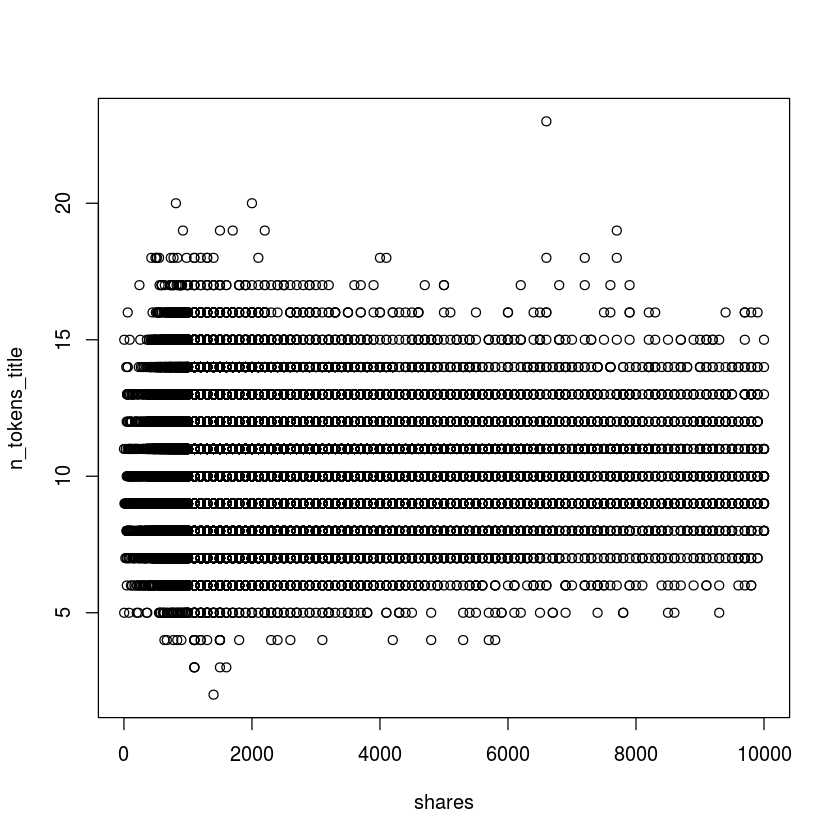

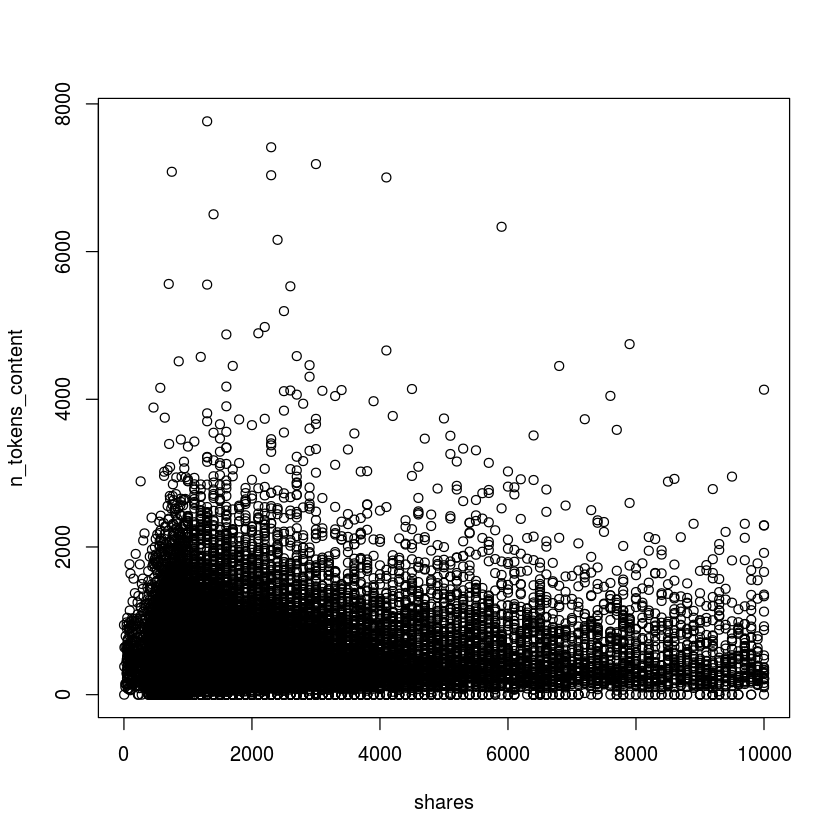

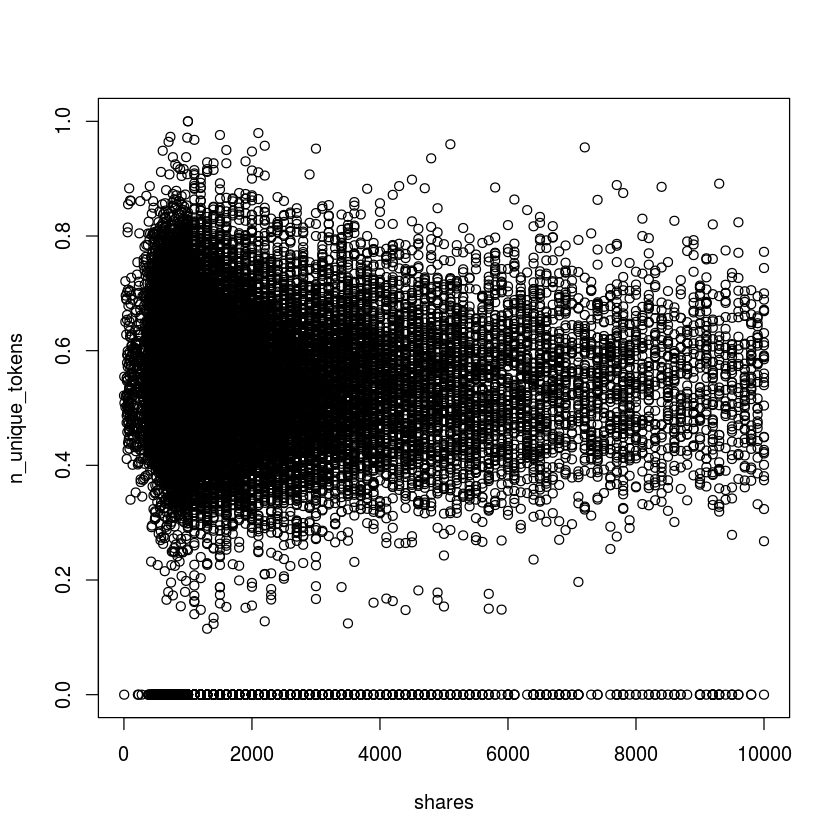

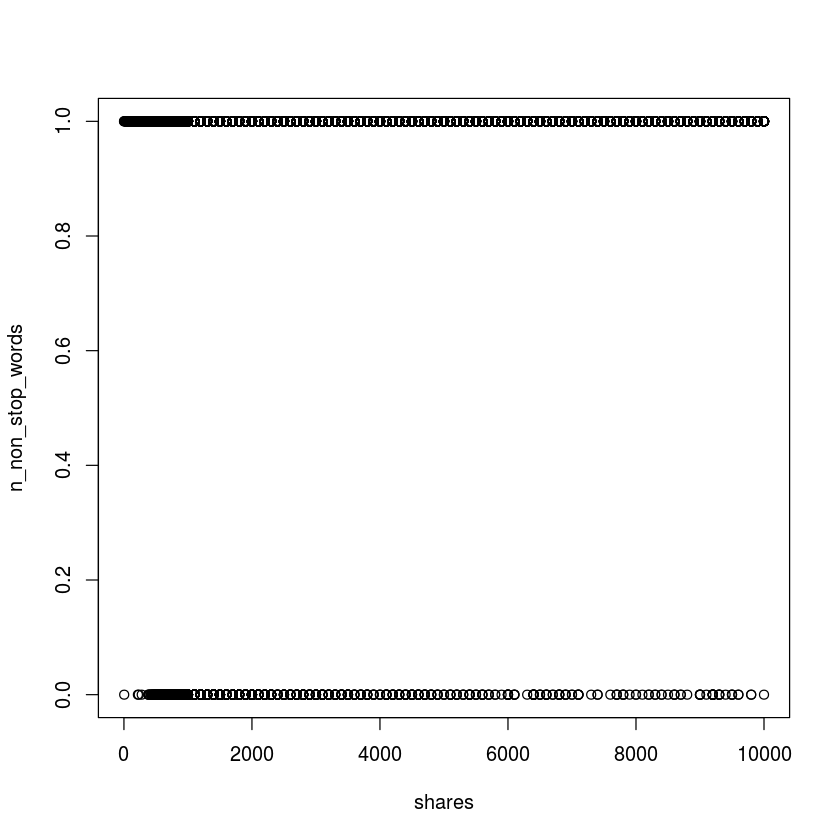

In [25]:
count = 0
label_key = "shares"
outlier_list = c()
for(i in names(working_shares_trim_df)){
    plot(working_shares_trim_df[,c(label_key,i)])
}

In [26]:
working_shares_trim_cor_matrix= cor(working_shares_trim_df, method = "pearson",)

In [27]:
working_shares_trim_cor_matrix["shares",]

n_tokens_title              n_tokens_content 
                 -0.032744412                   0.034530740 
              n_unique_tokens              n_non_stop_words 
                 -0.044955597                  -0.028265208 
     n_non_stop_unique_tokens                     num_hrefs 
                 -0.053559525                   0.081708764 
               num_self_hrefs                      num_imgs 
                  0.026381807                   0.067694472 
                   num_videos          average_token_length 
                  0.014493471                  -0.039531198 
                 num_keywords     data_channel_is_lifestyle 
                  0.062616927                   0.030055669 
data_channel_is_entertainment           data_channel_is_bus 
                 -0.084769908                  -0.016321522 
       data_channel_is_socmed          data_channel_is_tech 
                  0.089856429                   0.066473486 
        data_channel_is_world                    kw_min_min 
                 -0.125474836                   0.019896828 
                   kw_max_min                    kw_avg_min 
                  0.018289994                   0.026087726 
                   kw_min_max                    kw_max_max 
                  0.011929509                  -0.006981846 
                   kw_avg_max                    kw_min_avg 
                  0.031280152                   0.097083162 
                   kw_max_avg                    kw_avg_avg 
                  0.075480237                   0.168996148 
    self_reference_min_shares     self_reference_max_shares 
                  0.049207319                   0.055291285 
   self_reference_avg_sharess             weekday_is_monday 
                  0.060562894                  -0.008598479 
           weekday_is_tuesday          weekday_is_wednesday 
                 -0.025024413                  -0.029977070 
          weekday_is_thursday             weekday_is_friday 
                 -0.022609382                  -0.004307656 
          weekday_is_saturday             weekday_is_sunday 
                  0.071304059                   0.070881902 
                   is_weekend                        LDA_00 
                  0.104157656                   0.047344991 
                       LDA_01                        LDA_02 
                 -0.053973068                  -0.132031800 
                       LDA_03                        LDA_04 
                  0.069993654                   0.057467822 
          global_subjectivity     global_sentiment_polarity 
                  0.050349986                   0.044478569 
   global_rate_positive_words    global_rate_negative_words 
                  0.046992944                  -0.013575903 
          rate_positive_words           rate_negative_words 
                  0.017462749                  -0.051210803 
        avg_positive_polarity         min_positive_polarity 
                  0.015048043                  -0.021607325 
        max_positive_polarity         avg_negative_polarity 
                  0.028440378                  -0.015959730 
        min_negative_polarity         max_negative_polarity 
                 -0.015628578                  -0.004093753 
           title_subjectivity      title_sentiment_polarity 
                  0.038559912                   0.042195979 
       abs_title_subjectivity  abs_title_sentiment_polarity 
                  0.002901190                   0.041759459 
                       shares 
                  1.000000000

#### Correlation results:
    - We can see that there are only 4 features which have correlation of more that 10%, which is very bad if we are trying to achieve R^2 bigger than 0.6 

In [28]:
correlation_with_label = working_shares_trim_cor_matrix["shares",]
count = 1
for(i in correlation_with_label){
    curr_corr = abs(i)
    # print(curr_corr)
    if(curr_corr > 0.1){
        print(curr_corr)
        print(count)
    }
    count = count + 1
}

[1] 0.1254748
[1] 17
[1] 0.1689961
[1] 26
[1] 0.1041577
[1] 37
[1] 0.1320318
[1] 40
[1] 1
[1] 59


In [53]:
head(working_shares_trim_cor_matrix[, 17])

n_tokens_title         n_tokens_content          n_unique_tokens 
             0.048367661              0.056514583             -0.076089698 
        n_non_stop_words n_non_stop_unique_tokens                num_hrefs 
            -0.003355312             -0.027161357             -0.027717208

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     925    1400    2029    2400   10000 

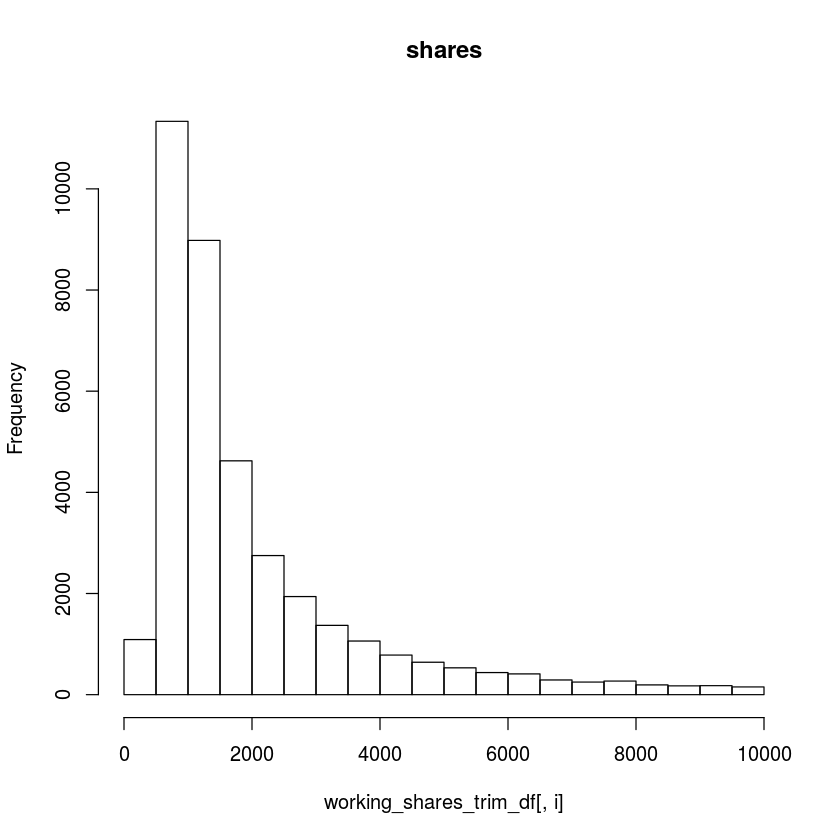

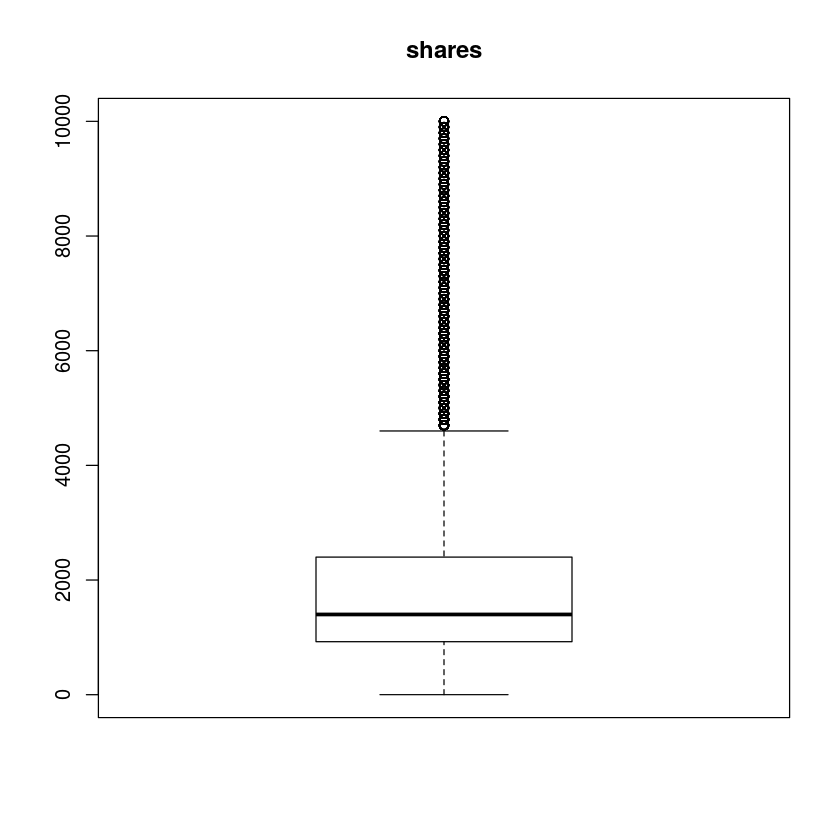

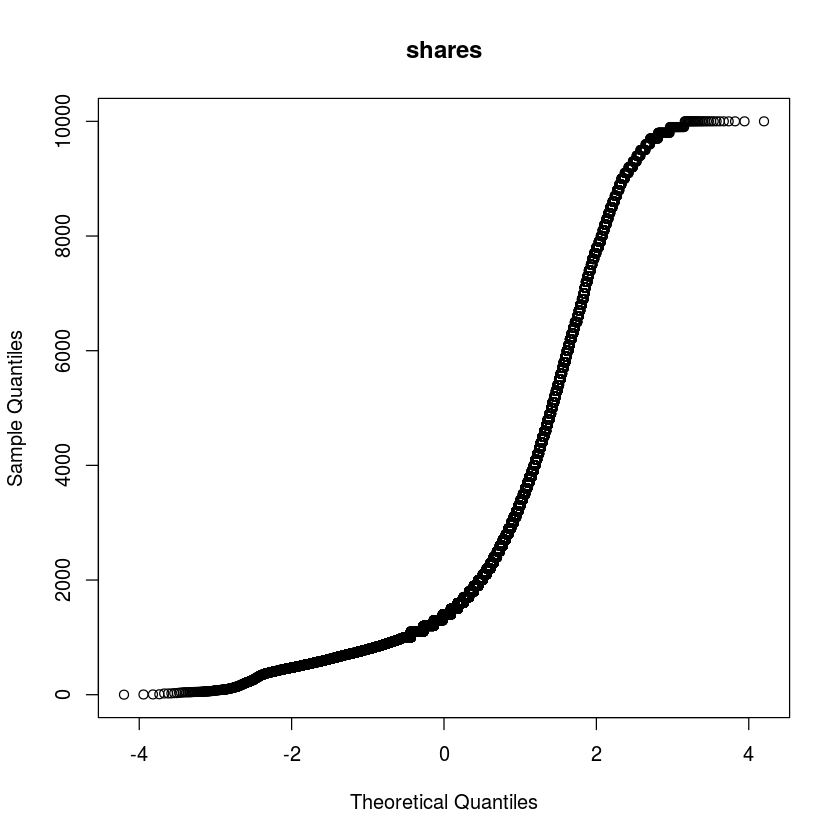

In [29]:
i = "shares"
label="shares"
summary(working_shares_trim_df[,i])
hist(working_shares_trim_df[,i],main=label)
boxplot(working_shares_trim_df[,i],main=label)
qqnorm(working_shares_trim_df[,i],main=label)


#### We could try to use only more correlated features or remove the outlier rows in order to increase our correlation ratings
    - Lets try a model with only our top features

In [30]:
top_features_df = working_shares_trim_df[,c(17,26,37,40,59)]
typeof(top_features_df)

[1] "list"

In [54]:
head(top_features_df)

data_channel_is_world kw_avg_avg is_weekend LDA_02     shares
1 0                     0          0          0.04000468  593  
2 0                     0          0          0.05009625  711  
3 0                     0          0          0.03335142 1500  
4 0                     0          0          0.49465083 1200  
5 0                     0          0          0.02857518  505  
6 0                     0          0          0.02223128  855

In [31]:
top_features_model = lm(shares~.,data=top_features_df)
summary(top_features_model)


Call:
lm(formula = shares ~ ., data = top_features_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7868.0 -1036.7  -574.4   351.7  8536.0 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1475.83538   27.60661  53.459  < 2e-16 ***
data_channel_is_world -186.91805   39.78269  -4.698 2.63e-06 ***
kw_avg_avg               0.19612    0.00748  26.219  < 2e-16 ***
is_weekend             511.06639   26.66734  19.165  < 2e-16 ***
LDA_02                -354.52537   58.06965  -6.105 1.04e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1730 on 37453 degrees of freedom
Multiple R-squared:  0.04638,	Adjusted R-squared:  0.04628 
F-statistic: 455.4 on 4 and 37453 DF,  p-value: < 2.2e-16


#### Results:
    - From initial baseline model of 0.02 by removing some outliers we went to 0.09, by leaving only top feature we went down 0.046, we should try to remove the outliers. 

#### Lets try a jack knife outlier test

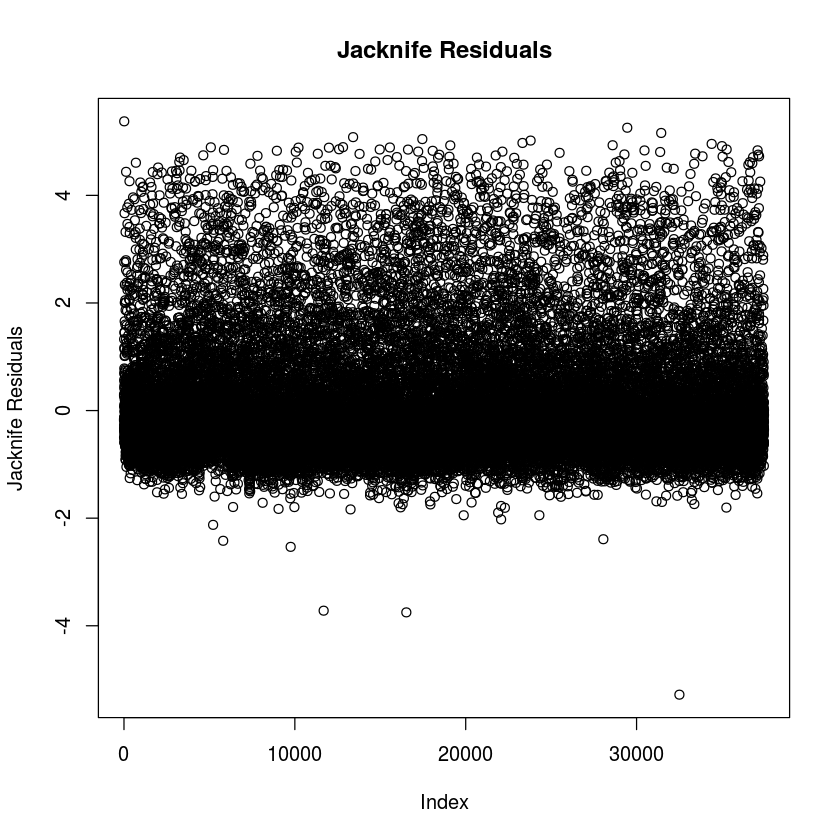

In [32]:
model_jack_knife = lm(shares~., data=working_shares_trim_df)
jack=rstudent(model_jack_knife)
plot(jack,ylab="Jacknife Residuals",main="Jacknife Residuals")

#### Lets remove items bigger than 3 for now:

In [33]:
jack_3_outliers = jack[abs(jack)>3]
jack_3_indexes = as.numeric(names(jack_3_outliers))

In [34]:
jack_3_df = working_shares_trim_df[-jack_3_indexes,]

#### Lets validate our score:

In [35]:
jack_3_model = lm(shares~.,data=jack_3_df)
summary(jack_3_model)


Call:
lm(formula = shares ~ ., data = jack_3_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8635.6  -971.4  -511.9   301.8  8876.9 

Coefficients: (3 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1.332e+03  1.374e+02   9.696  < 2e-16 ***
n_tokens_title                 3.593e-01  4.398e+00   0.082 0.934881    
n_tokens_content               8.171e-02  3.470e-02   2.355 0.018535 *  
n_unique_tokens               -1.329e+02  2.954e+02  -0.450 0.652717    
n_non_stop_words               3.749e+01  8.703e+02   0.043 0.965643    
n_non_stop_unique_tokens      -1.063e+02  2.510e+02  -0.424 0.671797    
num_hrefs                      6.638e+00  1.047e+00   6.341 2.31e-10 ***
num_self_hrefs                -1.592e+01  2.727e+00  -5.839 5.29e-09 ***
num_imgs                       3.326e+00  1.388e+00   2.397 0.016557 *  
num_videos                     2.112e+00  2.482e+00   0.851 0.394762  

#### Interesting enough our R score got worse, we could have done an error

In [36]:
jack_3_outliers

14        37        96       126       201       210       304       332 
 5.376316  3.668503  3.319531  4.437790  3.776736  3.469689  3.844418  3.412505 
      337       356       462       554       636       639       665       709 
 4.263354  3.296605  3.730967  3.962858  3.928578  3.273488  3.536790  3.316789 
      719       724       931       954       955       988      1033      1050 
 3.208934  4.607086  3.724962  3.174701  3.383411  4.239562  3.671162  4.066227 
     1110      1118      1167      1179      1207      1223      1351      1504 
 3.100118  4.152231  4.162837  3.745155  3.089325  3.953507  3.433679  3.000013 
     1578      1581      1615      1628      1644      1661      1687      1730 
 4.240192  3.829769  3.685330  3.183026  3.272063  4.156435  3.996523  3.610478 
     1740      1755      1790      1814      1855      1943      2023      2068 
 4.434134  3.848581  3.651549  3.375580  3.026831  3.133353  4.393590  4.517698 
     2123      2139      2155      2171      2250      2291      2303      2371 
 3.596146  3.479848  4.001602  3.476645  3.565888  4.424645  3.402652  3.201776 
     2426      2432      2540      2658      2741      2745      2795      2820 
 3.863853  3.181247  3.491894  4.296120  3.102554  3.141421  4.153650  4.034333 
     2898      2922      2934      2964      3076      3113      3118      3171 
 3.771878  3.753128  4.444742  4.123121  3.644238  3.603958  3.781395  3.669165 
     3189      3196      3214      3238      3247      3262      3313      3389 
 4.457591  3.054172  4.303750  3.409167  4.118897  4.412087  4.185552  3.434357 
     3398      3415      3416      3420      3446      3554      3578      3626 
 4.621576  4.464369  3.506797  4.032774  4.703578  3.707170  3.776684  3.887420 
     3629      3669      3744      3789      3802      3824      3847      3859 
 4.144458  4.655646  3.480527  3.190342  3.323758  4.126881  3.827513  3.145409 
     3861      3932      4011      4045      4062      4153      4263      4266 
 3.908283  3.050613  3.098708  3.113038  4.311884  4.458495  3.900570  3.932067 
     4336      4349      4389      4393      4526      4578      4613      4653 
 3.521215  3.082173  4.261908  4.254827  3.864251  3.989283  3.976677  3.666654 
     4712      4775      4790      4805      4898      4948      4949      5037 
 4.303737  3.656459  3.210814  3.083956  4.744538  3.118228  3.592030  3.097088 
     5039      5041      5042      5048      5071      5086      5139      5151 
 3.783087  3.450804  4.006499  4.281167  4.358779  3.086934  3.193383  3.398655 
     5176      5193      5285      5335      5360      5364      5446      5468 
 3.368523  3.035189  3.897625  3.585204  3.437953  4.893178  3.026578  4.021065 
     5480      5488      5492      5509      5538      5543      5559      5594 
 4.342826  3.475753  3.680831  4.469057  3.305145  3.358935  3.056172  3.877429 
     5655      5679      5800      5808      5813      5841      5897      5913 
 3.614483  3.073751  3.455594  3.135683  3.761827  3.017269  3.189963  3.355483 
     5918      5919      5932      6080      6147      6152      6172      6181 
 3.363274  3.503629  3.685133  4.309685  3.466971  3.415754  4.001419  4.845351 
     6182      6207      6241      6331      6334      6335      6336      6382 
 3.434705  3.080481  3.793009  3.663213  3.465521  3.952766  4.455883  3.247366 
     6408      6417      6462      6479      6481      6494      6520      6591 
 3.772376  3.432126  3.877993  3.990880  3.502977  3.306497  3.216479  3.939109 
     6613      6624      6659      6714      6723      6738      6751      6881 
 4.335668  3.621171  3.672398  3.336990  3.919194  4.196260  3.011279  3.235094 
     6956      7032      7036      7068      7100      7103      7159      7240 
 3.741676  3.874198  4.225832  3.283709  3.082879  3.546738  4.223045  3.066209 
     7253      7256      7261      7262      7280      7353      7377      7402 
 3.090233  4.077909  3.020191  4.15916

#### Ridge:
    - Needs investigation R^2

In [37]:
library(MASS)
jack_3_model_ridge = lm.ridge(shares~.,data=jack_3_df)
summary(jack_3_model_ridge)

       Length Class  Mode   
coef   58     -none- numeric
scales 58     -none- numeric
Inter   1     -none- numeric
lambda  1     -none- numeric
ym      1     -none- numeric
xm     58     -none- numeric
GCV     1     -none- numeric
kHKB    1     -none- numeric
kLW     1     -none- numeric

In [38]:
names(jack_3_model_ridge)

[1] "coef"   "scales" "Inter"  "lambda" "ym"     "xm"     "GCV"    "kHKB"  
[9] "kLW"

In [39]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [40]:
# working_shares_trim_df[, -c("shares")]
X = subset( working_shares_trim_df, select = -c(shares))
y = subset( working_shares_trim_df, select = c(shares))

In [41]:
set.seed(489)
train = sample(1:nrow(X), nrow(X)/2)
test = (-train)
ytest = y[test]

In [42]:
train

[1] 34567 20055 25720  8404  3480 24191 18259 29516 17180 18196 25421 13504
   [13] 28814 25365 29841  5830  5749 15123  4958  3581 14664 26729 15287  4655
   [25] 29819 10736  5800 32735 29107  1086 10555 21450  4154  4378 10625 31078
   [37] 31100  1496 19447  5242 16642 19412 13968 16831  2513 12809 23855  5287
   [49] 27729 32409 17510 16101 11445 19813 15471 18253 31569  2019  2093  7428
   [61] 22343 12042  6754 21969 18873 24796  6995 24570  8273  3508   816  5001
   [73] 37384 13077   937  7218 19638 11323 27246 27569 27142  3127   242  2754
   [85] 20834 13864 16964 22567 22804  1862 12842  2618 16006 14963 20669 11638
   [97] 11463   849 27187 31957 36649 25893 29448 31453 22698 21901  2929 25023
  [109] 15463 20018 14189 34699 36073 22150 16519 18271 23215 22591  7594 22699
  [121] 34147 16833 28469  2797  5277  8342 20085  3870 13198 22952  6765 33719
  [133] 31991 24364  5199   558 31580  5360 13564 20140 28209 11589 21681 33671
  [145] 33899  5623 19389 35844 18165 36838 27063  5054 15686 11730  7586 25875
  [157] 15734  5688 31811   802 10249  3573  7802  5630 10951 30857 33784  2913
  [169] 33563 10055  1307 16151 33848 24464  6766 27835 17203 33173 37430 22877
  [181] 21171 21905 20699 22908 29204 14760 33257 16746 31239 34007 14525 26028
  [193] 24259 27873 11077 11710 33994 36796 35591 19590 36130 19338  8330 16467
  [205] 28550 21869 23926  5642 12719  6741 17805 33684  7845 10180 26661 20728
  [217]  4304 20732 32448 31443 25697  8770 12792 16803 30350  5719 15305 25077
  [229] 16237 35833  8170 31343 27129 12406  6103 13767 15964 19305 12737  5262
  [241]  8863 16899 17786 26544 22677 27830 14462  8931  8481 35632 28599 21744
  [253] 23155  6647 16850 29613  5311  6585 22291   221 36081 34520  8814 25667
  [265]  1776 20664  6749 35303 36138  2244  2200  9010 24042 15882 32736 22304
  [277] 10620 35351 17343 10398 34084  9117 22895 24811 28928  3525 20545 13007
  [289]  7956 14397  2539  6969 29949 31768 32279 16988 37170  4355 28012 27494
  [301] 29986 21697 15837 15970 26400 18390 25754 17056 33763 29273   870    97
  [313] 20399  7910 18682 14992 21393 12306  1623 18600 13425 17150 37190  9837
  [325] 33234 11479 27136 17314 34966 37022  3403 21722 18075 24937  8822  4828
  [337] 31953 25529 34837  3997 26799 16242 25021 35295  4407 34185  2846 17208
  [349] 17418  4600 20041 20320 32873 36156 32254  8045  1816 22825  5975 20074
  [361] 12091  3726 17273  3818 16245 28600  4440  8756 30093 14267  8918 34149
  [373]   397  1248 23238  7081 13656 31252 18640 17373 17428 13910 15534 17090
  [385]  5150  1680 32647 37196   894  4079  3149 37272 18538  9083 24048 31026
  [397] 23984 15550  1027  8068 29211  2579  4592 31034  7884 35498 10540 34041
  [409] 31729 27318 26362  7817 14614 22381 11682 15376 11240  2345 27734 28868
  [421] 22141 29077 33926 13313 24246 12892 16927   316 11120 18410   847 11915
  [433]  7507 21603 10277 31336 36203 31273 11440 35346 21219 34442 18573 17621
  [445] 32000 24273 14210 34904 11224  6779 35019  6341 17888 26507 10848 12067
  [457] 25538 18498 26875 20705 11777  3140 25788  4586 12931   127  9084 32839
  [469] 26374  7204  4391 11356 16956 27719 10874 23199 30014 12419 10667 12450
  [481]  1408 36869 29098 20096 14495  4281   282 36662  3642 28485 14039 11919
  [493] 31759 22629 15677  4468 31838  5543 24407 32655 14585 23033 28635 16518
  [505]  3220 18435 14173 14959 31992 25535 26872 16175  5429 22687 33212 32281
  [517]  3450 21573 37349 16442  7698 29664 19204 15100 33528 36462  8608 11292
  [529] 18188 11337  8971 32203  7939    21 14750 21517 16861 32456 10581 37404
  [541]  7299 34833 10967  7433 27979 34044  1740  1665  1282 28987 16095 10182
  [553] 18527  6746   133 13446  7885  2257 11335 27013  4272 28842 35737 25603
  [565] 13429 18919 31202 27183 22774 36248 23145  5035 13013 13284 35063 11450
  [577]  5241 12598 22211 33317 10079 21015 22344 27635  3490 31962 22488 23300
  [589] 35963 33924 14279 10005 24810 34201 15481 14991 34322 21423 37221 27145
  [6

#### TODO Get the least correlated column with the label, try and test if they are any worthy
#### MIght remove all the features with low correlation the label but with big correlation with other more corelated features

In [43]:
correlation_with_label = working_shares_trim_cor_matrix["shares",]
count = 1
low_cor_indexes = c()
for(i in correlation_with_label){
    curr_corr = abs(i)
    # print(curr_corr)
    if(curr_corr < 0.02){
        low_cor_indexes = append(low_cor_indexes, count)
    }
    count = count + 1
}

In [44]:
working_no_low_cor_df = working_shares_trim_df[,-low_cor_indexes]
working_no_low_cor_dim = dim(working_shares_trim_df[,-low_cor_indexes])
print(working_no_low_cor_dim)

working_no_low_cor_model = lm(shares~.,data=working_no_low_cor_df)
print("Trimmed model: ")
print(summary(working_no_low_cor_model))
working_shares_trim_model = lm(shares~.,data=working_shares_trim_df)
print("full model")
print(summary(working_shares_trim_model))
print("full anova results")
print(anova(working_no_low_cor_model, working_shares_trim_model))

[1] 37458    44
[1] "Trimmed model: "

Call:
lm(formula = shares ~ ., data = working_no_low_cor_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8845.8  -976.3  -518.6   306.7  9080.6 

Coefficients: (2 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    9.846e+02  1.070e+02   9.202  < 2e-16 ***
n_tokens_title                -2.487e+00  4.298e+00  -0.579 0.562888    
n_tokens_content               1.012e-01  3.297e-02   3.070 0.002143 ** 
n_unique_tokens                9.704e+01  2.818e+02   0.344 0.730589    
n_non_stop_words               5.859e+02  2.228e+02   2.630 0.008552 ** 
n_non_stop_unique_tokens      -2.488e+02  2.421e+02  -1.028 0.304104    
num_hrefs                      6.523e+00  1.028e+00   6.345 2.25e-10 ***
num_self_hrefs                -1.557e+01  2.690e+00  -5.787 7.24e-09 ***
num_imgs                       3.321e+00  1.341e+00   2.477 0.013245 *  
average_token_length

[1] "full anova results"
Analysis of Variance Table

Model 1: shares ~ n_tokens_title + n_tokens_content + n_unique_tokens + 
    n_non_stop_words + n_non_stop_unique_tokens + num_hrefs + 
    num_self_hrefs + num_imgs + average_token_length + num_keywords + 
    data_channel_is_lifestyle + data_channel_is_entertainment + 
    data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + 
    kw_avg_min + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + 
    self_reference_min_shares + self_reference_max_shares + self_reference_avg_sharess + 
    weekday_is_tuesday + weekday_is_wednesday + weekday_is_thursday + 
    weekday_is_saturday + weekday_is_sunday + is_weekend + LDA_00 + 
    LDA_01 + LDA_02 + LDA_03 + LDA_04 + global_subjectivity + 
    global_sentiment_polarity + global_rate_positive_words + 
    rate_negative_words + min_positive_polarity + max_positive_polarity + 
    title_subjectivity + title_sentiment_polarity + abs_title_sentiment_polarity
Model 2: shares ~

p-value is close to zero but we have to test these samples one by one

In [45]:
correlation_with_label = working_shares_trim_cor_matrix["shares",]
count = 1
low_cor_anova_indexes = c()
working_shares_trim_model = lm(shares~.,data=working_shares_trim_df)
for(i in correlation_with_label){
    curr_corr = abs(i)
    if(curr_corr < 1){
        working_no_low_cor_df = working_shares_trim_df[,-c(count)]
        working_no_low_cor_model = lm(shares~., data=working_no_low_cor_df)
        anova_p_value = anova(working_no_low_cor_model, working_shares_trim_model)[["Pr(>F)"]][[2]]
        if(!is.na(anova_p_value)){
            if(anova_p_value < 0.05){
                print("Without feature num: ")
                print(count)
                low_cor_anova_indexes = append(low_cor_anova_indexes, count)
                print(anova(working_no_low_cor_model, working_shares_trim_model)[["Pr(>F)"]][[2]])
                print("*******")   
            }
        }
    }

    count = count + 1
}

[1] "Without feature num: "
[1] 2
[1] 0.01131538
[1] "*******"
[1] "Without feature num: "
[1] 6
[1] 9.508187e-10
[1] "*******"
[1] "Without feature num: "
[1] 7
[1] 2.083465e-09
[1] "*******"
[1] "Without feature num: "
[1] 8
[1] 0.005307853
[1] "*******"
[1] "Without feature num: "
[1] 10
[1] 3.496361e-05
[1] "*******"
[1] "Without feature num: "
[1] 11
[1] 2.523233e-08
[1] "*******"
[1] "Without feature num: "
[1] 12
[1] 0.005486429
[1] "*******"
[1] "Without feature num: "
[1] 13
[1] 7.029579e-14
[1] "*******"
[1] "Without feature num: "
[1] 14
[1] 2.118603e-06
[1] "*******"
[1] "Without feature num: "
[1] 15
[1] 1.476161e-11
[1] "*******"
[1] "Without feature num: "
[1] 16
[1] 2.174473e-05
[1] "*******"
[1] "Without feature num: "
[1] 18
[1] 0.0007114955
[1] "*******"
[1] "Without feature num: "
[1] 19
[1] 0.0001610727
[1] "*******"
[1] "Without feature num: "
[1] 20
[1] 5.955223e-07
[1] "*******"
[1] "Without feature num: "
[1] 23
[1] 3.362165e-08
[1] "*******"
[1] "Without featu

In [46]:
working_no_low_anova_df = working_shares_trim_df[,-c(low_cor_anova_indexes)]
print(dim(working_no_low_anova_df))
working_no_low_anova_mode = lm(shares~.,data=working_no_low_anova_df)
summary(working_no_low_anova_mode)

[1] 37458    37



Call:
lm(formula = shares ~ ., data = working_no_low_anova_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5287.8 -1034.6  -577.6   323.2  8591.5 

Coefficients: (3 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.240e+03  8.825e+01  36.713  < 2e-16 ***
n_tokens_title               -1.899e+01  4.315e+00  -4.401 1.08e-05 ***
n_unique_tokens               3.783e+02  2.453e+02   1.542  0.12306    
n_non_stop_words             -4.145e+02  8.721e+02  -0.475  0.63456    
n_non_stop_unique_tokens     -1.056e+03  2.188e+02  -4.827 1.39e-06 ***
num_videos                   -1.615e+00  2.398e+00  -0.674  0.50045    
data_channel_is_world        -2.060e+02  4.032e+01  -5.110 3.24e-07 ***
kw_min_max                    1.601e-05  1.555e-04   0.103  0.91799    
kw_max_max                   -6.042e-06  4.244e-05  -0.142  0.88679    
self_reference_min_shares     6.303e-04  1.209e-03   0.521  0.6021

#### Results:
We tried to for each feature to build an anova test, and remove the feature if it's statistically insignificant. We are using more than 30 features to have a 4.5% score, while we had 4.6% with only the top 4-5 features

#### further actions

    - Considering the majority of cases in which shares are 0, we could devide these cases as edge cases and split the data in 2 dataframes and analyse both in a similar fasion
    - We can try to have a base dataframe of the top features and extend the model from there

#### Edge cases to be considered
    - In the beginning we trimmed the high shared news, we could do a analysis for them in another dataframe as well.

In [47]:
summary(working_shares_trim_df)

 n_tokens_title n_tokens_content n_unique_tokens  n_non_stop_words
 Min.   : 2.0   Min.   :   0.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 9.0   1st Qu.: 248.2   1st Qu.:0.4709   1st Qu.:1.0000  
 Median :10.0   Median : 413.0   Median :0.5387   Median :1.0000  
 Mean   :10.4   Mean   : 548.0   Mean   :0.5306   Mean   :0.9713  
 3rd Qu.:12.0   3rd Qu.: 718.0   3rd Qu.:0.6074   3rd Qu.:1.0000  
 Max.   :23.0   Max.   :7764.0   Max.   :1.0000   Max.   :1.0000  
 n_non_stop_unique_tokens   num_hrefs      num_self_hrefs     num_imgs      
 Min.   :0.0000           Min.   :  0.00   Min.   :  0.0   Min.   :  0.000  
 1st Qu.:0.6264           1st Qu.:  4.00   1st Qu.:  1.0   1st Qu.:  1.000  
 Median :0.6906           Median :  7.00   Median :  3.0   Median :  1.000  
 Mean   :0.6736           Mean   : 10.73   Mean   :  3.3   Mean   :  4.426  
 3rd Qu.:0.7544           3rd Qu.: 13.00   3rd Qu.:  4.0   3rd Qu.:  4.000  
 Max.   :1.0000           Max.   :304.00   Max.   :116.0   Max.   :12

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     816    1100    1124    1400    2000 


[1] 26028    59

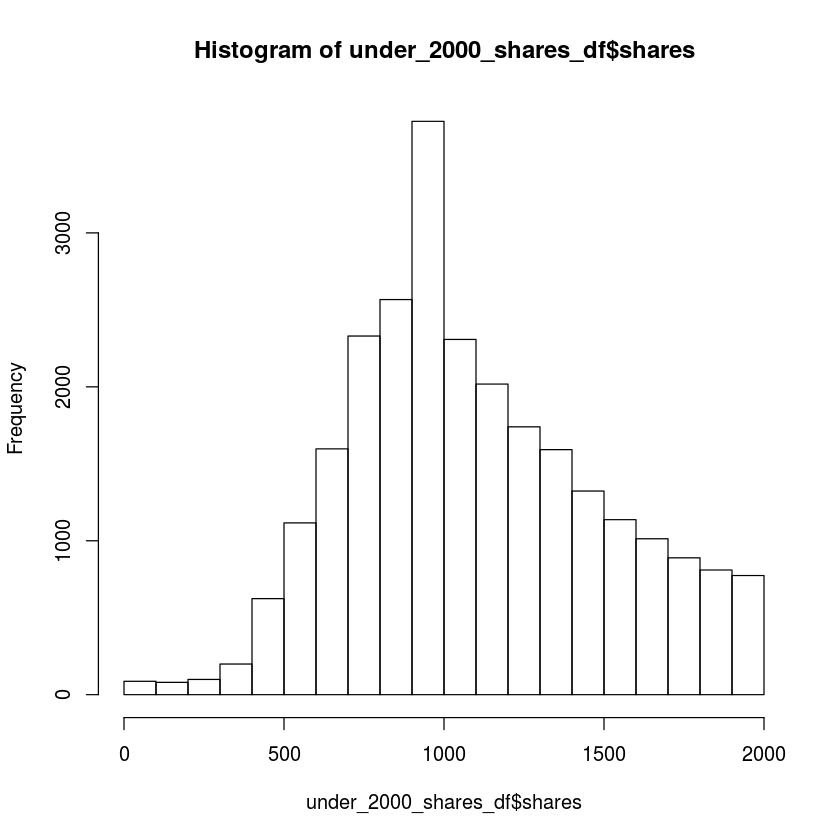

In [48]:
#> X[X$Variable1!=11 & X$Variable1!=12, ]
under_2000_shares_df = working_shares_trim_df[working_shares_trim_df$shares <= 2000, ]
print(summary(under_2000_shares_df$shares))
hist(under_2000_shares_df$shares)
dim(under_2000_shares_df)

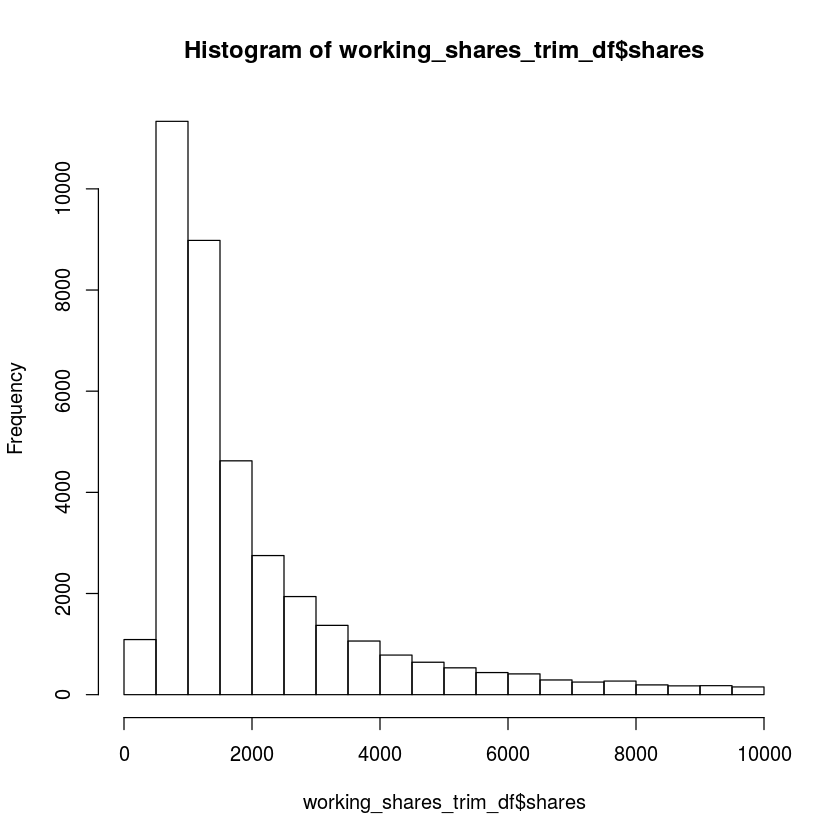

In [49]:
hist(working_shares_trim_df$shares)

#### PCA

In [50]:
prcomp_inst = prcomp(working_shares_trim_df)